## TP 5 : Stokes Flow

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---

$\underline{\text{Objectif :}}$ résoudre l'écoulement de Stokes dans une cavité carrée à couvercle en utilisant la formulation de la fonction de vorticité-flux introduite dans l'introduction de ce challenge.

Pour se faire, nous utiliserons quelques méthodes de résolution numérique tel que la méthode de Jacobi, sa version compilée, etc. qui nous permettrons en outre, de nous rendre compte de l'efficacité de ces dernières tout comme nous avons pu nous en rendre compte tout au long des notebooks de ce 5ème module. 

Finalement, nous nous intéresserons à la convergences de ces méthodes et à leur comportement qui, comme nous le verrons, est intimement lié à la physique du problème.

---

##### 1. Rappels et développement théorique.
---

L'écoulement de Stokes (également appelé "écoulement glissant") et son hypothèse nous offres un excellent moyen de simplifier les équations de Navier-Stokes régissant le mouvement d'un fluide dans l'approximation d'un milieu continu.

Notons tout de même que cette hypothèse consistant à supposer que l'on ai un nombre de reynolds $Re^{1}$ proche de 0 n'est pas incontournable pour résoudre le problème "Stokes flow". En effet, ce dernier peut-être résolu (par des méthodes qui ne seront pas abordées ici) pour des nombres de Reynolds de l'ordre de 100, 400 voir 1000.


---
###### [1] Le nombre de Reynolds $Re$ est donné par le rapport du terme associé à un transport convectif de quantité de mouvement $(\vec{v} . \vec{\nabla}) \vec{v}$  et du terme de transport par diffusion visqueuse $\nu \nabla ^2 \vec{v}$ des équations de Navier-Stokes :  $Re = \frac{vL}{ \nu }$ où $\nu$ est donc la viscosité du fluide, $v$ une vitesse caractéristique de l'écoulement et $L$ est une longueur caractéristique.
---

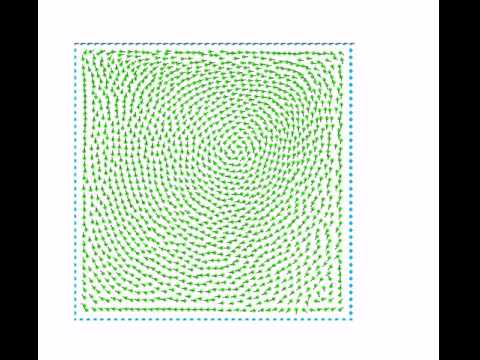

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('VFwK2BsWcOc')

###### Figure 1. Vidéo du problème Stokes flow (Lid Driven Cavity problem) résolu pour une valeur du nombre de Reynolds de $Re = 400$ par la méthode SPH (Smoothed Particle Hydrodynamics) détaillé dans le lien [2] fournit dans les sources.

---

À présent, redérivons succintement les fonctions de vorticité-flux comme nous l'avons vu dans l'introduction théorique de ce TP. 

Débutons pour cela par les équations de Navier-Stokes pour un écoulement incompressible

\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}

et procédons à une mise à l'échelle de cette équation,

\begin{equation}→
Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*
\end{equation}

L'équation de transport de vorticité pour l'écoulement de Stokes est alors obtenue en utilisant l'hypothèse de Stokes d'un nombre de Reynolds proche de 0 permettant de se débarasser des termes non-linéaire tout en procédant au remaniement de certain termes. Nous obtenons donc

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

$$
{}
$$

L'équation pour la fonction de courant 

$$
\begin{array}{}
\nabla ^2 \psi = -\omega  \hspace{2.0cm} (* *)
\end{array}
$$

est quant à elle obtenue par une simple manipulation des relations qui définissent la fonction de courant, à savoir :

\begin{equation}
u = \frac{\partial \psi}{\partial y} \hspace{1.0cm} \text{   et   } \hspace{1.0cm} v = - \frac{\partial \psi}{\partial x}
\end{equation}

 et de la vorticité exprimée en 2d par :
 
\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Nous obtenons donc le système suivant de deux équations couplées qui nous permet de décrire l'écoulement du fluide dans notre problème

$$
\left\{
\begin{array}{}
\Delta \omega = 0 \hspace{2.5cm} (*)\\
\Delta \psi = - \omega \hspace{2.0cm} (* *)
\end{array}
\right.
$$

Passons maintenant à la discrétisation de ces équations.

---

##### 2. Discrétisation des équations courant-vorticité et des conditions aux bords.

---

#### 2.1 Discrétisation des équations :
---

Nous disposons donc du système d'équations couplées suivant à discrétiser:

$$
\left\{
\begin{array}{}
\Delta \omega = 0    \hspace{3.5cm}  (*)\\
\Delta \psi = - \omega \hspace{3.0cm}  (* *)
\end{array}
\right.
$$

L'équation $(*)$ n'est rien d'autre qu'une équation de Laplace tandis que l'équation $(* *)$ correspond à une équation de Poisson dont le terme de source n'est autre que la fonction de vorticité $\omega$.
Par conséquent, la discrétisation de nos équations sera très similaire à ce que nous avons pu voir dans les notebook de ce 5ème module.
Commençons par l'équation $(*)$.

$$
{}
$$

* Discrétisation de l'équation $(*)$:

À 2 dimension, notre équation est donnée par :

\begin{equation}
\hspace{1.0cm} \frac{\partial ^2 \omega}{\partial x^2} + \frac{\partial ^2 \omega}{\partial y^2} = 0
\end{equation}

Discrétisons cette dernière au moyen d'une différence centrale comme suit :

\begin{equation}
→ \frac{\omega^{k}_{i+1, j}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i-1,j} }{\Delta x^2} + \frac{\omega^{k}_{i,j+1}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i, j-1} }{\Delta y^2} = 0
\end{equation}

qui, lorsque $\Delta x^2 = \Delta y^2$ nous donne :

\begin{equation}
→ \omega^{k}_{i+1, j}   + \omega^{k}_{i-1,j} + \omega^{k}_{i,j+1}  + \omega^{k}_{i, j-1}- 4 \omega^{k}_{i,j} = 0
\end{equation}

ou encore, en procédant à quelques réarrangements,

\begin{equation}
→ \omega^{k}_{i,j} = \frac{1}{4} \left(\omega^{k}_{i,j-1} + \omega^k_{i,j+1} + \omega^{k}_{i-1,j} + \omega^k_{i+1,j} \right)
\end{equation}

$$
{}
$$

* Discrétisation de l'équation $(* *)$:

À 2 dimension, notre équation est donnée par :

\begin{equation}
\frac{\partial ^2 \psi}{\partial x^2} + \frac{\partial ^2 \psi}{\partial y^2} = - \omega
\end{equation}

Discrétisons cette équation de Poisson comme on l'a vu dans le second notebook de ce module, e.g, au moyen d'une diférence centrale pour les dérivées et avec $- \omega$ comme terme de source :


\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta y^2} = -  \omega_{i,j}^{k}
\end{equation}

Or nous avons ici que $\Delta x^2 = \Delta y^2$

\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta x^2} = -  \omega_{i,j}^{k}
\end{equation}

On fait alors passer le delta dans le membre de droite,

\begin{equation}
→ \psi_{i+1,j}^{k} - 4\psi_{i,j}^{k}+ \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} = - \omega_{i,j}^{k} \Delta x^2
\end{equation}

et on isole finalement $\psi_{i,j}^{k}$,

$$
\begin{array}{}
→ \psi_{i,j}^{k} = \frac{1}{4} \left( \psi_{i+1,j}^{k} + \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} + \omega_{i,j}^{k} \Delta x^2 \right)
\end{array}
$$

---
#### 2.2 Discrétisation des conditions aux bords :
---

Pour rappel, nous disposons des conditions aux bords (CB) de Neumann et de Dirichlet (respectivement) pour la fonction de courant $\psi$ suivantes :

$$
\left\{
\begin{array}{}
\frac{\partial \psi}{\partial x} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord gauche)}\\
\frac{\partial \psi}{\partial x} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord droit)}\\
\frac{\partial \psi}{\partial y} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord inférieur)}\\
\frac{\partial \psi}{\partial y} = 1 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord supérieur)}
\end{array}
\right.
$$

$$
{}
$$

Nous désirons alors discrétiser les conditions aux bords pour la fonctions de vorticité $\omega$ en tenant en compte les CB pour $\psi$.

Débutons par le bord supérieur. 

Pour cela, développons quelque peu le raisonnement aborder dans l'introduction théorique de ce TP, en commençant par discrétiser $\omega$ au moyen d'un différence centrale du second ordre:

\begin{equation}
→ \omega_j = - \left(\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2}\right)
\end{equation}

Nous allons ensuite utiliser une discrétisation du 3e ordre le long du bord supérieur. Cette discrétisation s'opère en prenant 3 points proches du bord comme illustré sur la figure 2 ci-dessous:

---

![Image](./figures/bord_sup.png)

---
###### Figure 2. Esquisse des points, sélectionnés de part et d'autre du bord supérieur du domaine, utiles à la discrétisation de ce dernier.

$$
{}
$$

La fonction de courant $\psi$ est alors développée en série de puissance en ces 3 points :

$$
\begin{array}{}
\psi (y+ \Delta y) = \psi (y) + \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 + \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (i)\\
\psi (y- \Delta y) = \psi (y) - \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (ii)\\
\psi (y- 2 \Delta y) = \psi (y) - 2 \frac{\partial \psi}{\partial y} \Delta y+ 2 \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{4}{3} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.1cm} (iii)\\
\end{array}
$$

$$
{}
$$


Nous multiplions ensuite (i) par a, (ii) par b et (iii) par c et nous sommons les termes en les dérivées premières, seconde et troisième en imposant que ces trois sommes valent, respectivement 1, 0 et 0 et ce afin de ne conserver au final que les dérivées premières.

Nous disposons donc du système suivant à résoudre :

$$
\left\{
\begin{array}{}
a - b - 2c = 1\\
\frac{1}{2}a + \frac{1}{2}b + 2c =0\\
\frac{1}{6}a - \frac{1}{6}b - \frac{4}{3} c =0
\end{array}
\right.
$$

La résolution de ce système nous fournit alors trois coefficients qui lorsque l'on somme (i), (ii) et (iii) annule comme souhaité les termes en les dérivées seconde et troisième. Nous obtenons ainsi 

\begin{equation}
\hspace{-1.5cm}(i) + (ii) + (iii) : \hspace{0.5cm}\frac{1}{3}\psi_{j+1} - \psi_{j-1} + \frac{1}{6}\psi_{j-2} = - \frac{1}{2}\psi_{j} + \left. \frac{\partial \psi}{\partial y}\right|_j \Delta y
\end{equation}

dès lors

\begin{equation}
→ \left.\frac{\partial \psi}{\partial y}\right|_j = \frac{2\psi_{j+1} - 6\psi_{j-1} + \psi_{j-2} + 3\psi_j}{6 \Delta y}
\end{equation}

Ce qui correspond bien à l'expression donnée dans la partie théorique de l'énoncé de ce TP et où 

$$
\begin{array}{}
\left.\frac{\partial \psi}{\partial y}\right|_j = u_j = 1
\end{array}
$$

$$
{}
$$

Isolons maintenant $\psi_{j+1}$ (la valeur de $\psi$ hors du domaine) pour obtenir ce dernier en fonction des points du domaine uniquement:

\begin{equation}
\psi_{j+1} = \frac{6\Delta y + 6 \psi_{j-1} - \psi_{j-2} - 3\psi_j}{2}
\end{equation}

Injectons ensuite ceci dans l'expression discrétisée de $\omega$ pour finalement obtenir (avec $\psi_{i,j} = 0$, notre condition au bord de Dirichlet):

$$
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3}{\Delta y} + \mathcal{O}(\Delta y^2)  \hspace{1.5cm} \text{(bord supérieur)}
\end{array}
$$

$$
{}
$$

La CB du bord supérieur étant fait, nous pouvons attaquer les 3 autres bords. 

Brièvement, en prenant les points repris sur la figure 3 çi-dessous 

---

![Image](./figures/bords.png)

---
###### Figure 3. Esquisse des points sélectionnés de part et d'autre des bords inférieur, gauche et droit du domaine, utiles à la discrétisation de ce dernier.

$$
{}
$$

et en procédant similairement à ce qui a été fait pour le bord supérieur tout en veillant à isoler le point hors du domaine qui diffère d'un bord à l'autre, ainsi qu'en appliquant les conditions aux bords de Neumann et de Dirichlet adéquates rappeler plus haut, nous obtenons :

$$
{}
$$

$$
\left\{
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i, j+1} - \psi_{i, j+2}) + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord inférieur)}\\
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i-1, j} - \psi_{i-2, j}) + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord droit)}\\
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i+1, j} - \psi_{i+2, j}) + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord gauche)}\\
\end{array}
\right.
$$

---

##### 3. Résolution du Problème.
---

Maintenant que nous disposons de tout les outils théoriques utiles, nous pouvons passer à la résolution de notre problème qui, comme annoncé dans l'introduction, sera réalisé par diverse méthodes dans le but de comparer plus loin, l'efficacité de ces dernières.

La première d'entre-elle n'est autre que la méthode de Jacobi. Elle sera suivie d'une version compilée d'elle même, de la méthode de Gauss-Seidel et finalement de la méthode de SOR (Successive Over-Relaxation) qui se repose toutes sur la méthode qui la précède (en suivant l'ordre d'énonciation).

---

#### 3.1 Méthode de Jacobi.
---

Commençons par importer les librairies qui nous seront utiles pour la suite.

In [2]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm, rcParams
%matplotlib inline
from math import pi
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous définissons ensuite une fonction pour la norme L1 d'après l'algorithme qui nous a été donné.

Une fois implémentée, cette dernière va donc nous permettre de définir un critère d'arrêt basé sur l'intervalle entre deux solutions successives égale à la précision souhaitée soit $10^{-6}$ dans ce cas-ci.

En outre, cette norme nous permettra d'étudier la rapidité de convergence des diverses méthodes qui seront abordées.

Finalement, notons que l'utilisation de la norme L1 plutôt qu'une norme L2 (voir une norme infinie) comme nous l'avons fait tout au long des notebooks de ce module est un simple choix.

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

Nous allons maintenant redéfinir quelque peu la fonction Jacobi que nous avons vu dans le 1er notebook en tenant compte de notre problème, ses conditions aux bords et ses conditions intiales.

Le premier changement à opérer consiste à modifier la condition d'arrêt de la boucle **while** opérant l'algorithme de la méthode de Jacobi. En effet, la fonction Jacobi était initialement conçue pour résoudre numériquement une équation de Laplace or comme mentionné précédemment, nous disposons ici d'un système d'équation couplées constitué d'une équation de Poisson pour $\psi$ et d'une équation de Laplace pour $\omega$.

Notre nouveau critère d'arrêt doit donc se baser sur une norme calculée d'après les valeurs de $\omega$ et sur une seconde norme calculée d'après les valeurs de $\psi$. Les deux normes devant avoir une valeur plus petite que la précision souhaité pour satisfaire totalement à notre nouveau critère d'arrêt.  

Le deuxième changement se situe au sein même de la boucle, il s'agit de l'implémentation de la discrétisation des équations $(*)$ et $(* *)$ ainsi que des conditions au bords pour $\omega$.

Notons enfin que les conditions aux bords seront calculées juste avant l'implémentation de l'équation de poisson étant donné que $\omega$ n'est autre que le terme de source de cette dernière. Il convient donc de mettre à jour les valeurs de  $\omega$ avant de les utiliser pour le calcul de $\psi$.

Nous avons donc la fonction de Jacobi suivante.

NB: La fonction *jacobi* nous retournera les 4 informations utiles, pour répondre aux questions qui nous ont été posées, à savoir: 

- la valeur de $\psi$ pour tout notre domaine à la dernière itération
- la valeur de $\omega$ pour tout notre domaine à la dernière itération
- le nombre d'itération nécessaire pour parvenir à satisfaire notre critère d'arrêt
- le tableau de la norme L1 de psi pour l'étude de la convergence de la méthode

In [4]:
def jacobi(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    iterations: Nombre
        Nombre d'itération nécessaire pour satifaire le critère d'arrêt
    l1_conv: Tableau à 1D
        Tableau contenant les valeurs de la norme L1 de psi
        pour chaque itération
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi

    return psi, om, iterations, l1_conv

Enfin, nous définissons une dernière fonction qui n'est autre que la fonction " *plot_3D* " vue dès le premier notebook de ce module et qui va nous permettre de vérifier l'implémentation de nos conditions initiales.

In [5]:
def plot_3D(x, y, p):
    '''Créer un graphique en 3D avec les limites et l'angle de vue approprié

    Paramètres:
    ----------
    x: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    y: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    psi: Tableau à 2D de float
        Distribution de p calculée
    
    '''
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('\n$x$',fontsize=20)
    ax.set_ylabel('\n$y$',fontsize=20)
    ax.set_zlabel('\n$z$',fontsize=20)
    ax.view_init(30,45)

Maintenant que nous disposons de tout les outils utiles à la résolution de notre problème, il ne nous reste qu'a initialiser nos paramètres et conditions initiales ainsi que les conditions aux bords pour la configuration initiale.

In [6]:
#Initialisation des paramètres initiaux
nx = 41            # Nombre de point discrétisant l'axe x
ny = 41            # Nombre de point discrétisant l'axe y
l = 1.             # Limite en x de notre domaine (cavité)
h = 1.             # Limite en y de notre domaine (cavité)
d = l/(nx-1)       # delta
l1_target = 1e-6   # Critère d'arrêt

# Conditions initiales
psi0 = numpy.zeros((ny,nx))
om0  = numpy.zeros((ny,nx))

# Bord supérieur
om0[-1,:] = -0.5/(d**2)*(8*psi0[-2,:]-psi0[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om0[0,:] = -0.5/(d**2)*(8*psi0[1,:]-psi0[2,:])

# Bord droit
om0[:,-1] = -0.5/(d**2)*(8*psi0[:,-2]-psi0[:,-3])
        
# Bord gauche
om0[:,0] = -0.5/(d**2)*(8*psi0[:,1]-psi0[:,2])


# Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

Vérifions que nos conditions initiales et conditions aux bords aient correctements été implémentées à l'aide d'une figure à 3D et donc à l'aide de notre fonction "*plot _3D*".

Pour $\psi$ nous avons ainsi :

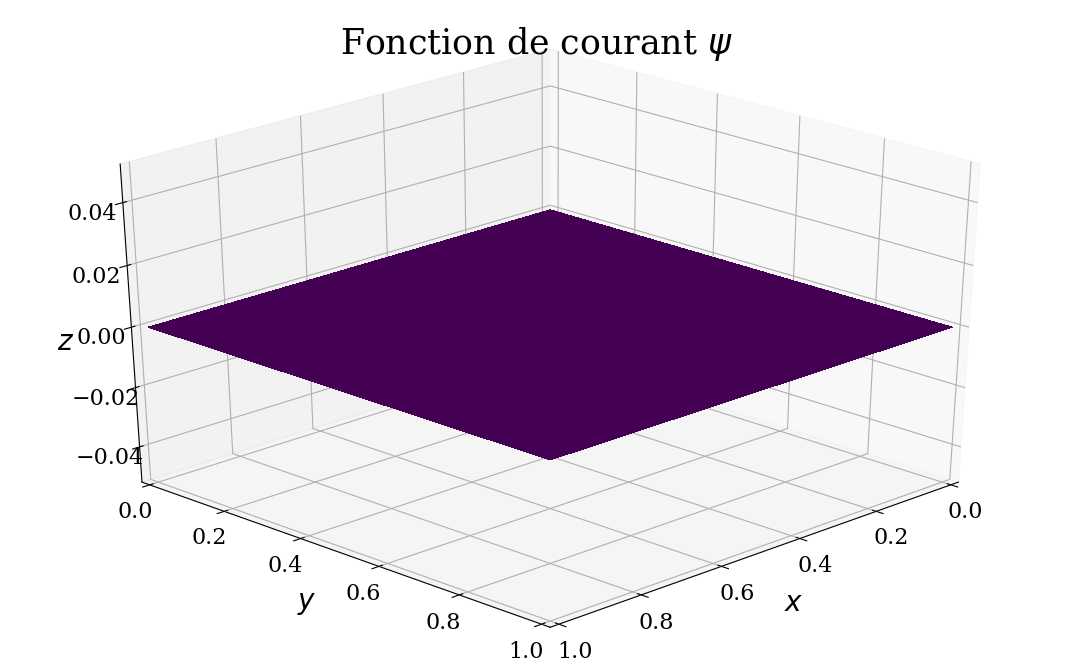

In [7]:
plot_3D(x,y,psi0)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)
pyplot.tight_layout()

Ce qui est conforme à nos attentes.
Regardons alors la fonction de vorticité $\omega$ :

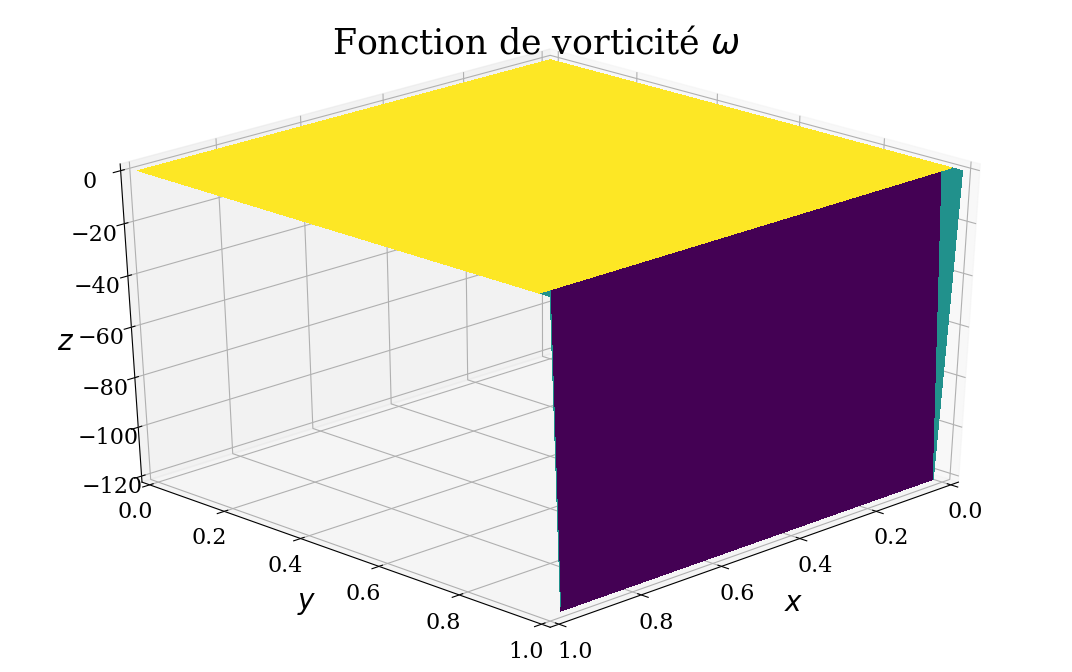

In [8]:
plot_3D(x,y,om0)
pyplot.title("Fonction de vorticité $\omega$", fontsize = 25)
pyplot.tight_layout()

Ce qui est à nouveau conforme à nos attentes. En effet prenons, par exemple, la valeur de $\omega_z$ minimale (la composante z de $\omega$) correspondant au niveau du bord inférieur.

Etant donné que $\psi$ est initialement nul nous aurons que 

$$
\begin{array}{}
\omega = -\frac{3}{d}
\end{array}
$$

ce qui nous donne d'après l'expression de d : 

$$
\begin{array}{}
d = \frac{l}{nx-1} = 0.025\hspace{2.0cm} \text{avec } l = 1 \text{ et }  nx =41
\end{array}
$$

→ $\omega = -120$ ,ce qui est bien ce que l'on observe.

Nos conditions initiales ayant correctement été implémentées, nous pouvons désormais faire appel à notre fonction " *jacobi* " pour résoudre notre problème.

In [9]:
psi, om, iterations, l1_conv = jacobi(om0.copy(), psi0.copy(), d, l1_target)

print("\n→ La méthode de Jacobi prend {} itérations à la tolérance {}".format(iterations, l1_target))


→ La méthode de Jacobi prend 2771 itérations à la tolérance 1e-06


Nous voyons d'ores et déjà via cette "impression" du nombre d'itération, que l'algorithme que nous venons d'implémenter fonctionne (cela n'implique pas pour autant que le résultat soit correcte). 

NB: Le nombre d'itération que nous venons de ressortir nous sera utile par la suite, lorsque nous comparerons l'efficacité des diverses méthodes que nous testerons.

Avant de calculer les diverses données nécessaires pour vérifier la bonne implémentation de la méthode Jacobi vérifions au moyen d'une figure à 2D que notre situation finale correspond bien à celle figurant sur le site :

http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info

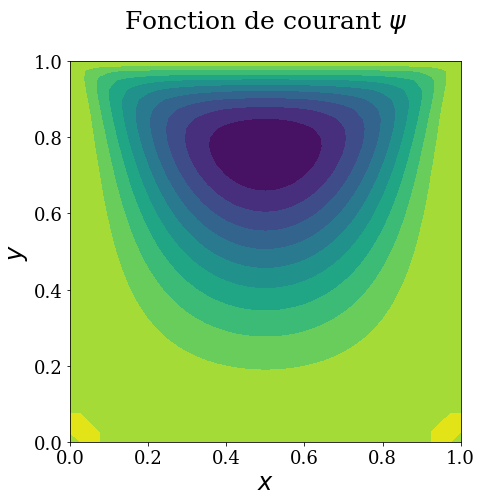

In [10]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)
pyplot.title("Fonction de courant $\psi$\n", fontsize = 25)
pyplot.xlabel('$x$', fontsize=24)
pyplot.ylabel('$y$', fontsize=24)
pyplot.tick_params(axis='both',labelsize=18)

Ce qui correspond exactement à la figure représentée.

Que pouvons nous d'ores et déjà en déduire ? 


Physiquement, les contours de couleurs du graphique correspondent aux courbes de niveau de $\psi$, et donc aux lignes de courant. Par conséquent, on en déduit que le système tourne par niveau à des vitesses différentes. En d'autres termes, il présente un écoulement tourbillonaire où chaque "niveau" possèdent une certaine vorticité. On parlera alors d'isocourbes pour qualifier ces lignes de courant où les particules de fluide auront une même vitesse/vorticité.

Notons enfin que les particules vont moins vite lorsque l'on s'approche du centre du vortex (région bleue foncée), ce que l'on peut également voir dans la vidéo d'introduction.

Ceci peut s'expliquer en raisonnant en terme de flux. En effet, une fois le système relaxé, le flux doit être constant dans le temps d'une isocourbe à une autre. Par conséquent, la distance que doit parcourir une particule sur une isocourbe plus éloignée du centre du vortex sera plus grande que la distance que devra parcourir une même particule sur une isocourbe plus proche du centre du vortex. On comprend alors aisément par cette différence de distance à parcourir que la vitesse variera en fonction de la proximité du centre du vortex. Elle sera moins élevée pour une particule proche du centre de ce dernier que pour une particule plus excentrée.

Ressortons maintenant les diverses informations demandées ce qui nous permettra de vérifier une ultime fois si notre problème a correctement été implémenté et résolu.

Commençons par ressortir les valeurs maximales (spécifié avec 4 décimales) de $| \psi |$ et $| \omega |$ à l'intérieur de la cavité pour la solution "relaxée".

Pour se faire, nous allons parcourir l'ensemble des valeurs de psi obtenues à la dernière itération à l'aide de 2 boucles **for** (une première pour l'indice de ligne et une seconde pour l'indice de colonne). Un bouléen nous permettra alors de comparer deux à deux les valeurs absolues de $\psi$ et de n'en garder que la valeur la plus élevée. Un second bouléen nous permettra alors de faire de même pour $|\omega|$.


Remarque : Comme à notre habitude, nous sortons l'ensemble des résultats avec le nombre de décimales désirées au moyen de la fonction proposé par numpy : $round()$.

In [11]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("\n→ La valeur maximale de la valeur absolue de la fonction de courant, \n psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité, \n omega, est :",round(om_max,4))


→ La valeur maximale de la valeur absolue de la fonction de courant, 
 psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité, 
 omega, est : 78.1927


Nous constatons agréablement que nos valeurs correspondent exactement aux valeurs renseignées par le site.
Enfin, ressortons les 6 nombres demandés via le code fournit dans l'énoncé du problème.

In [12]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



Ce qui correspond à nouveau aux valeurs (exactes) renseignées par le site.
Nous pouvons donc conclure par tout ce qui précède que le problème a correctement été résolu.

Toutefois, ceci ne signifie pas que le travail que nous pouvons accomplir est terminé. En effet, comme annoncé dans le début de ce notebook nous allons tenter de résoudre ce problème via quelques unes des diverses méthodes de résolution numérique que nous avons vu dans ce 5ème module.

La prochaine étape est donc de réaliser une version optimisée de la méthode de Jacobi en passant par des boucles et en compilant cette dernière. En outre, en plus d'accroître la vitesse de résolution de notre problème, cette version optimisée nous servira également de base pour la méthode de résolution suivante, la méthode de Gauss-Seidel.

---

#### 3.2 Méthode de Jacobi compilée.
---

Commençons par importer les éléments nécessaires à la compilation.

In [13]:
import numba
from numba import jit

Nous allons maintenant définir deux nouvelles fonctions. 

La première réunira simplement nos conditions aux bords (CB) implémentées via des boucles. En effet, après avoir réaliser les diverses méthodes nécessitant l'emplois de boucles. Nous nous somme rendu compte que puisque les CB étaient identiques, l'emplois d'une fonction réunissant ces dernières pouvaient réduire sensiblement, mais de manière assez agréable, le nombre de ligne de code facilitant ainsi la lecture des diverses fonctions utilisées.

In [14]:
@jit(nopython=True)   
def CB(psi, om):
    
    for i in range(1,nx-1):
        om[-1,i] = -0.5/(d**2)*(8*psi[-2,i]-psi[-3,i])-(3/d) # Bord supérieur
        om[0,i] = -0.5/(d**2)*(8*psi[1,i]-psi[2,i])          # Bord inférieur

    for j in range(1,ny-1):
        om[j,-1] = -0.5/(d**2)*(8*psi[j,-2]-psi[j,-3])       # Bord droit
        om[j,0] = -0.5/(d**2)*(8*psi[j,1]-psi[j,2])          # Bord gauche

    return om

La seconde fonction n'est rien d'autre que notre fonction Jacobi implémentée en terme de boucles à la manière de ce qui a été fait au cours du 3e notebook de ce module ("*05 03 Iterate This*").

Remarques :
* Comme nous savons que le nombre d'itération sera de 2771 (de part la résolution du problème via la méthode de Jacobi et de part ce qui a été dit dans le 3e notebook, e.g que le nombre d'itération ne change pas avec la compilation) pour cette version compilée de la méthode Jacobi nous restreignons la taille des tableaux contenant les valeurs de la norme L1 pour $\psi$ et $\omega$ à 3000.

* Les variables "iter_diff_psi" et "iter_diff_om" associées à la valeur des normes L1 de $\psi$ et $\omega$ respectivement, sont initialisées à "l1_target +1" afin que le critère d'arrêt ne soit pas satisfait dès la première itération.

In [15]:
@jit(nopython=True)
def jacobi_compil(om, omn, psi, psin, d, l1_target):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    iterations: Nombre
        Nombre d'itération nécessaire pour satifaire le critère d'arrêt
    l1_diff_psi: Tableau à 1D
        Tableau contenant les valeurs de la norme L1 de psi
        pour chaque itération
    '''


    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (omn[j,i-1] + omn[j,i+1]\
                              + omn[j-1,i]  + omn[j+1,i])
                
        # On impose les conditions aux bords
        CB(psi, om)   
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psin[j,i-1] + psin[j,i+1]\
                                + psin[j-1,i]  + psin[j+1,i] + om[j,i] * d**2)
            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Vérifions à présent si cette "nouvelle" méthode a été correctement implémentée. Commençons pour cela par appeler notre nouvelle fonction et vérifions si le nombre d'itération correspond à nos attentes.

In [16]:
psi, om, iterations, l1_diff_psiJ = jacobi_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

print("\n → La méthode de Jacobi compilée prend {} itérations à la \n tolérance: {}".format(iterations, l1_target))


 → La méthode de Jacobi compilée prend 2771 itérations à la 
 tolérance: 1e-06


Nous voyons ici que le nombre d'itération n'a pas changer ce qui est conforme à nos attentes.

En outre, nous pouvons (pour ne vérifier que cela) vérifier que les 6 nombres demandés correspondent bien aux valeurs renseignées.

In [17]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



À nouveau, nous constatons agréablement que les valeurs obtenues correspondent exactement aux valeurs renseignées par le site fournit plus haut.
Nous en concluons que cette implémentation de la version compilée de la méthode de Jacobi a été correctement effectuée.

Remarque: les performances de chacune des méthodes seront analysées dans la section 4.

---

#### 3.3 Méthode Gauss-Seidel.
---

Comme annoncé, la méthode de Gauss-Seidel (G-S) est la 3ème méthode que nous allons utiliser et servira, comme la version de Jacobi compilée l'est pour G-S, de base à la dernière méthode que nous aborderons de ce notebook, la méthode de SOR (Successive Over-Relaxation).

De plus, la méthode de G-S n'est rien d'autre qu'une version améliorée de Jacobi. En effet, pour rappel, l'idée principale de la méthode de G-S est l'utilisation de valeurs de la solution mises à jours dès qu'elles sont disponibles contrairement à Jacobi où l'on attend que les valeurs de la grille entière soient mises à jour pour calculé la solution.

Par conséquent, il suffit de modifier les valeurs de $\psi$ et $\omega$ qui sont prises pour calculé la solution à chaque étape à la manière dont cela a été fait dans le 3e notebook de ce module pour notre problème. 

Nous définissons ainsi la fonction suivante:

In [18]:
@jit(nopython=True)
def gauss_seidel(om, omn, psi, psin, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Gauss-Seidel avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psin
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    iterations: Nombre
        Nombre d'itération nécessaire pour satifaire le critère d'arrêt
    l1_diff_psi: Tableau à 1D
        Tableau contenant les valeurs de la norme L1 de psi
        pour chaque itération
    '''

    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
                
        # On impose les conditions aux bords
        CB(psi, om) 
        
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Nous appelons ensuite notre nouvelle fonction,

In [19]:
psi, om, iterations, l1_diff_psiGS = gauss_seidel(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

print("\n→ La méthode de Gauss-seidel prend {} itérations à la tolérance {}".format(iterations, l1_target))


→ La méthode de Gauss-seidel prend 1410 itérations à la tolérance 1e-06


Nous voyons ici que le nombre d'itération suit le comportement espéré, e.g a diminué par rapport à la méthode de Jacobi. Ceci nous donne d'ores et déjà un premier aperçu de l'efficacité de la méthode G-S que nous aborderons dans la section 4.

Enfin, vérifions les 6 nombres usuels.

In [20]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



À nouveau, toutes les valeurs coïncident exactement avec les valeurs de référence. Nous pouvons dès lors affirmer que le problème a correctement été résolu.

Passons à la 4e et dernière méthode, la méthode de sur-relaxation successive (SOR).

---

#### 3.4 Méthode de SOR (Successive Over-Relaxation).
---

Nous voici à la 4ème et dernière méthode que nous aborderons dans ce notebook, la méthode de SOR.

Comme nous avons pu le voir, la méthode de SOR améliore la méthode de G-S en utilisant, dans la mise à jour, une combinaison linéaire des solutions présentes et "actuelles".

Ainsi en modifiant la méthode de Gauss-Seidel de manière similaire à ce qui a été fait dans le notebook 3, nous obtenons la nouvelle fonction:

In [21]:
@jit(nopython=True)
def SOR(om, omn, psi, psin, d, l1_target, omega):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de SOR avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
    omega: float
        Paramètre de relaxation
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    iterations: Nombre
        Nombre d'itération nécessaire pour satifaire le critère d'arrêt
    l1_diff_psi: Tableau à 1D
        Tableau contenant les valeurs de la norme L1 de psi
        pour chaque itération
    '''

    
    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)

    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = (1-omega)*om[j,i] + omega*0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])

        # On impose les conditions aux bords
        CB(psi, om) 
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = (1-omega)*psi[j,i] + omega*0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Pour rappel, ici $\omega$ est le paramètre de relaxation (à ne pas confondre avec la fonction de vorticité également noté par $\omega$) dépendant de la physique du problème et qui détermine à quel point la méthode de SOR sera plus rapide que la méthode de G-S.

Notons également que la méthode de SOR ne sera stable que pour des valeurs de $\omega$ comprises entre 0 et 2 et qu'une valeur de $\omega$ égale à 1 nous redonnera la méthode de G-S.

Appelons à présent notre nouvelle fonction avec une valeur de $\omega$ de 1.1 par exemple.

In [22]:
omega = 1.1
psi, om, iterations, l1_diff_psiSOR = SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

print("\n→ La méthode numba SOR prend {} itérations à la tolérance {} \n et omega = {}".format(iterations, l1_target, omega))


→ La méthode numba SOR prend 1157 itérations à la tolérance 1e-06 
 et omega = 1.1


À nouveau, le nombre d'itération obtenus correspond tout à fait à nos attentes étant donné que la méthode de SOR demande moins d'itérations que les méthodes précédemment vues.

Finalement, vérifions une dernière fois nos 6 nombres demandés.

In [23]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



Les valeurs obtenues coïncidant exactement avec les valeurs de référence, nous en concluons que le problème a  été correctement résolu.

Avant de cloturé cette large partie consacrée aux méthodes de Jacobi, Gauss-Seidel et SOR, nous pouvons tenter d'optimiser cette dernière méthode via le paramètre $\omega$.

---

#### 3.5  SOR optimisée:
---

Le paramètre $\omega$ étant dépendant du problème, nous ne pouvons pas ré-employer l'expression donné dans le notebook 3 pour en obtenir la valeur optimal ($\omega _{opt}$).

En effet, cette expression dépend$^3$ de la taille du système d'équations et de la nature de celui-ci (de la structure des coefficients de matrice, tri-diagonale par exemple, etc.). On comprend donc que l'obtention d'une expression analytique de $\omega_{opt}$ n'est pas évidente. 

Cependant, à défaut d'avoir une expression analytique tentons tout de même de déterminer $\omega _{opt}$ "à la main", e.g par essais successifs de valeur. 

Après plusieurs essais nous déterminons ainsi que la valeur optimale$^*$ de $\omega$ est de: $\omega_{opt} \approx 1.218$ pour laquelle nous obtenons :

$$
{}
$$

---
$^*$ Notons que la valeur optimale de omega peut-être rafiné à souhait. Toutefois, n'observant aucun changement dans le nombre d'itération au-delà de 3 décimales, nous avons décidé de nous restreindre à la valeur de 1.218. .

In [24]:
omega = 1.218
psi, om, iterations, l1_diff_psiOSOR = SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

print("\n→ La méthode numba SOR optimisé prend {} itérations à la tolérance \n  {} et omega = {}".format(iterations, l1_target, omega))


→ La méthode numba SOR optimisé prend 914 itérations à la tolérance 
  1e-06 et omega = 1.218


Soit une réduction du nombre d'itération non négligeable.
Nous pouvons également vérifier que les 6 nombres souhaitées n'ont pas changer vis à vis de cette nouvelle valeur de $\omega$.

In [25]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



L'ensemble des valeurs étant correcte, nous pouvons conclure que la méthode de SOR a été correctement optimisée.

Passons maintenant à la comparaison et à l'analyse des performances des diverses méthodes utilisées.

---

##### 4.  Comparaison et analyse des performances des méthodes de Jacobi (compilée), Gauss-Seidel et SOR (optimisée).
---

Afin de comparer le temps de calcul de chacune des méthodes abordées, nous allons faire appel à la fonctionnalité proposé par numpy : `%%timeit` qui va executer un certain nombre de fois la fonction dont on veut connaitre le temps de calcul et moyenner ces valeurs afin d'obtenir un résultat plus précis comme on a pu le voir au cours des notebooks de ce module.

Appelons donc l'ensemble de nos fonctions avec cette fonctionnalité.

* Méthode de Jacobi :

In [26]:
%%timeit
jacobi(om0.copy(), psi0.copy(), d, l1_target)

585 ms ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


* Méthode de Jacobi compilée :

In [27]:
%%timeit
jacobi_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

71.6 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


* Méthode de Gauss-Seidel:

In [28]:
%%timeit
gauss_seidel(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

63.7 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


* Méthode de SOR:

In [29]:
omega = 1.1

In [30]:
%%timeit
SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

55.8 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


* Méthode de SOR optimisée :

In [31]:
omega = 1.218

In [32]:
%%timeit
SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

43 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

Pour plus de lisibilité, nous avons regroupé l'ensemble des temps de calcul moyen obtenus (sur les ordinateurs de l'`ULB`) au cours d'une même execution dans le tableau ci-dessous:

---

|    Méthodes    | Temps de calcul (ms)     | Nombre d'itérations |
|:--------------:|:------------------------:|:-------------------:|
|     Jacobi     |           488            |         2771        |
| Jacobi compilé |           46.5           |         2771        |
|      Gauss     |           44.0           |         1410        |
|       SOR      |           40.0           |         1157        |
| SOR optimisé   |           31.6           |          914        |

---

###### Figure 4. Tableau reprenant l'ensemble des temps de calcul obtenus (sur les ordinateurs de l'ULB) au cours "d'une même exécution" ainsi que le nombre d'itération de chacunes des méthodes.
---

Que pouvons nous dire à propos de ces résultats ? 

Premièrement, conformément à ce que l'on a vu dans ce module, nous constatons que la méthode SOR optimisée est bien la plus performante que ce soit du point de vue de la vitesse de calcul ou du nombre d'itération nécessaire pour satisfaire notre critère d'arrêt et donc du nombre d'itération nécessaire pour converger vers la solution.

Ensuite, avant de regarder un peu plus en détail les temps de calculs, notons que ces derniers dépendent également de la configuration de l'ordinateur utilisé. Toutefois, le fait qu'une méthode ai un temps de calcul inférieur(supérieur) à une autre méthode est invariant d'une configuration à une autre e.g la méthode de SOR sera toujours plus rapide que la méthode de Gauss-Seidel, etc. 

Ceci nous mène à la comparaison des temps de calcul de chacune des méthodes.
Nous nous attendions ici à avoir la situation suivante pour les temps de calculs $\tau ()$:


$$
\begin{array}{}
\hspace{-0.2cm} \tau \text{(SOR opt)} <  \tau \text{(SOR)} < \tau \text{(Jacobi compilé)} < \tau \text{(G-S)} < \tau \text{(Jacobi)} \hspace{1.0cm}
\end{array}
$$

Ce schéma est assez bien respecter pour le problème "Stokes flow" à une différence prêt : la méthode de Jacobi compilée est légèrement plus rapide que la méthode de G-S, ce qui n'est toutefois pas dérangeant.

Enfin, pour ce qui est du nombre d'itérations nous nous attendions d'une part à ce que la méthode de Jacobi ai le même nombre itération que sa version compilée et d'autre part à ce que le nombre d'itération décroisse avec les méthodes vues. En d'autre termes, nous nous attendions à ce que la méthode SOR optimisée nécessite le moins d'itération suivi des méthodes de SOR, G-S, Jacobi compilé & Jacobi, respectivement.

C'est précisément le comportement que l'on observe. Enfin, nous pouvons une dernière fois mettre en évidence l'efficacité propre à chaque méthode en réalisant pour chacune d'entre-elle, le graphique de la norme L1 de $\psi$ en fonction du nombre d'itération.

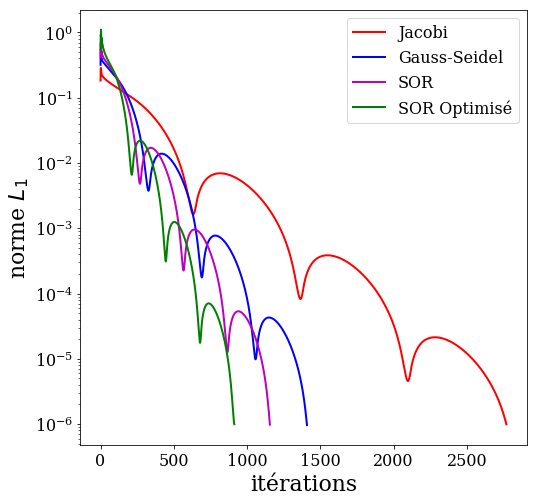

In [33]:
pyplot.figure(figsize=(8,8))
pyplot.xlabel(r'itérations', fontsize=22)
pyplot.ylabel(r'norme $L_1$', fontsize=22)
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiJ,'b'),
                'r-', lw=2, label='Jacobi')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiGS,'b'), 
                'b-', lw=2, label='Gauss-Seidel')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiSOR,'b'), 
                'm-', lw=2, label='SOR')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiOSOR,'b'), 
                'g-', lw=2, label='SOR Optimisé')
pyplot.legend(fontsize=16);

La convergence des normes L1 pour chacune des méthodes appuye à nouveau le fait que la méthode de SOR optimisée est la méthode la plus performante. 
Mais à quoi correspondent ces "rebonds" sur nos courbes de convergence ? Tentons de répondre à cette question.

---

##### 5. Etude de la convergence des méthodes.
---


La piste la plus vraisemblable pour expliquer le comportement de la convergence de nos solutions est liée à la physique du problème.
Dans ce cas, nous pouvons tenter de trouver une corrélation entre ces "rebonds" et la dynamique du fluide dans la cavité.

---
#### Etape 1 : tentative de corrélation par animation.

---

Tentons de vérifier cette hypothèse. Pour se faire, nous allons réaliser une animation avec les variations de $\psi$ en fonction du nombre d'itération via la méthode de Jacobi$^*$. Nous nous attendons ainsi à voir des fluctuations de $\psi$ pouvant être corrélées aux "rebonds" de la convergence. 


Commençons par importer la librairie utile à la réalisation de notre animation.

---
$^*$ Il s'agit ici d'un choix de travail totalement arbitraire.

In [34]:
from matplotlib import animation
from IPython.display import HTML

Et redéfinissons quelque peu notre fonction Jacobi afin de pouvoir réaliser notre animation.

Les changements à opérer sont peu nombreux et consistent simplement à définir un tableau ( *psi_ite* ) de taille égale à 2771 (soit le nombre d'itération requi pour que le critère d'arrêt soit vérifié) et qui nous servira à stocker les valeurs de $\psi$ à chaque itération. Ce tableau sera alors retourné par notre nouvelle fonction.

Notons que nous avons également$^*$ définis deux autres tableaux à savoir " *psi_30* " et " *l1_conv30* ". Ces deux derniers nous seront utiles par la suite et leur rôle sera éxpliqué en temps voulu.

Retenons pour l'instant que la définition de *psi_ite* est la seule modifications que nous avons à opérer à notre fonction jacobi pour réaliser notre animation.


---
$*$ Définir ces deux tableaux maintenant nous permet de ne pas devoir redéfinir de nouvelle fonction par la suite ce qui constitue, comme nous nous en sommes rendu compte une fois le travail terminé, un gain notable de lisibilité.

In [35]:
def jacobi_conv(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    psi_ite: Tableau à 2D de float
        Distribution de psi après relaxation.
    psi_30: Tableau à 2D de float
        Tableau de la valeur de psi dans la cellule [30,30] 
        pour toute les itérations.
    l1_conv30: Tableau à 1D
        Tableau contenant les valeurs de la norme L1 de psi
        pour la cellule [30,30] et ce pour chaque itération
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    # On définit nos nouveaux tableaux
    psi_ite = numpy.empty(2771,dtype=numpy.ndarray)    # Tableau utile à l'animation
    psi_30=[]
    l1_conv30=[]
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sauvegarde la valeur de psi
        psi_ite[iterations] = psi.copy()    # Sauvegarde de la valeur de psi pour toute les cellules
        psi_30.append(psi[30,30])         # Sauvegarde de la valeur de psi pour la cellule [30,30]
        
        
        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_psi30 = L1norm(psi[30,30],psin[30,30])      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi
        l1_conv30.append(norme_psi30)     # Sauvegarde de la norme pour psi[30,30]

    return psi_ite, psi_30, l1_conv30

Maintenant que notre nouvelle fonction a été définie, nous pouvons appeler cette dernière.

In [36]:
l1_target =1e-6
p, p_30, l1_conv30 = jacobi_conv(om0.copy(), psi0.copy(), d, l1_target)

Avant de réaliser notre animation, procédons à une "sélection" des tableaux de valeurs de psi de manière similaire à ce qui avait été fait pour le travail personnel "*Reaction diffusion model*". 

En effet, le nombre de tableau et donc d'image à créer étant de 2771, la mémoire alloué serait relativement grande tandis que la durée de l'animation serait trop longue pour ce que nous voulons faire. Dès lors, nous avons décidé de ne sélectionner qu'un tableau tout les 10 pas ce qui réduira leur nombre à 278 et nous permettra ainsi de réaliser une animation ni trop longue ni trop courte.

In [37]:
p_ite = numpy.empty(278,dtype=numpy.ndarray)

# Sélectionne et copie un tableau tout les 10 pas 
for i in range (2771):
    if i in numpy.arange(0,2771,10):
        p_ite[int(i/10)] = p[i].copy()

Réalisons finalement notre animation ...

In [38]:
fig = pyplot.figure(figsize=(8,5));
pyplot.title("Evolution de la valeur de $\psi$ dans notre domaine \n", fontsize = 18)
ims = []

for i in range(277):
    im = pyplot.imshow(p_ite[i], cmap= cm.viridis, animated=True)
    ims.append([im])

pyplot.xlabel('$x$', fontsize=22)
pyplot.ylabel('$y$', fontsize=22)
pyplot.tight_layout()
pyplot.close()    

anim = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
HTML(anim.to_html5_video())

... qui s'avère assez décevante ! En effet, hormis la première fluctuation/oscillation aucune autre d'entre-elle n'est observable étant donné leur faible amplitude comme on pouvait s'y attendre si on avait regardé d'un peu plus prêt l'ordre de grandeur de la norme L1.

---

#### Etape 2 : observation de l'évolution de $\psi$ au sein d'un cellule.
---
Il nous faut donc adopter une approche légèrement différente. Cette nouvelle approche que nous allons adopter consiste, non plus à regarder l'évolution de courant $\psi$ dans tout notre domaine mais au sein d'une seule cellule. Nous réaliserons alors un graphique de cette évolution que nous tenterons de corréler à nos "rebonds" de convergence.

C'est ici que le 2ème des 3 tableaux que nous avons définit dans notre nouvelle fonction jacobi, à savoir " *psi_30* ", intervient. Ce nouveau tableau contiendra donc les valeurs de $\psi$ de la cellule [30,30] pour toutes les itérations et sera retourné par notre fonction.

Notons qu'il n'est pas nécessaire de rappeler notre fonction car, lors du précédent appel, les valeurs de $\psi$ correspondant à la cellule$^*$ [30,30] ont déjà été extraites.

$
{}
$

---
$*$ Le choix de cette cellule a été effectué de tel sorte que l'on puisse bien voir les fluctuations du courant. Nous avons donc opté pour une cellule excentrée par rapport au centre du domaine (de taille $n_x$ x $n_y$ soit $41$x$41$).

---

Commençons donc tout d'abord par extraire l'itération à laquelle le premier rebond de la convergence intervient et ce au moyen d'un boléen qui va comparer les valeurs successives de la norme L1 de psi. L'arrêt de ce dernier sera alors forcé (au moyen d'un **break**) dès qu'une valeur de la norme est plus grande que celle qui la précède. En d'autre mot, le boléen s'arrêtera "dès que la valeur de la norme ré augmente".

In [39]:
for i in range(2771):
    if i>1 and l1_conv[i]<l1_conv[i+1]:
        j=i
        normeL1=l1_conv[i]
        print("\n→ L'itération recherchée est l'itération", i,"\n")
        break


→ L'itération recherchée est l'itération 633 



Maintenant que nous disposons de l'itération à laquelle intervient le premier rebond, nous pouvons alors passer à la réalisation de notre graphique.

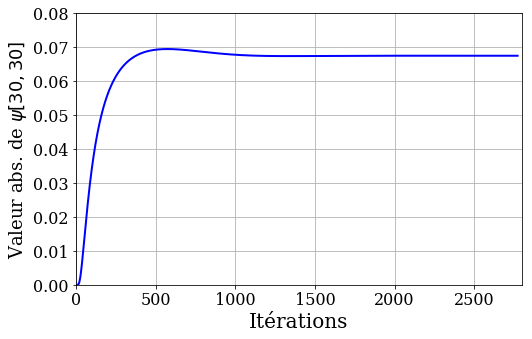

In [40]:
# Création de (la discrétisation de) l'axe x
xsi = numpy.linspace(0,2771,len(p_30))

pyplot.figure(figsize=(8,5))
pyplot.grid(True) 
pyplot.xlabel("Itérations", fontsize=20)
pyplot.ylabel("Valeur abs. de $\psi [30,30]$", fontsize=18)
pyplot.plot(xsi,numpy.abs(p_30), color='b', ls='-', lw=2)
pyplot.xlim(.0,2800) 
pyplot.ylim(.0,.08);

À nouveau, nous ne pouvons voir que la première fluctuation. Cependant, nous pouvons tenter de changer d'échelle par une série de "zoom" successif en resserant les valeurs en ordonnée. Nous obtenons ainsi,

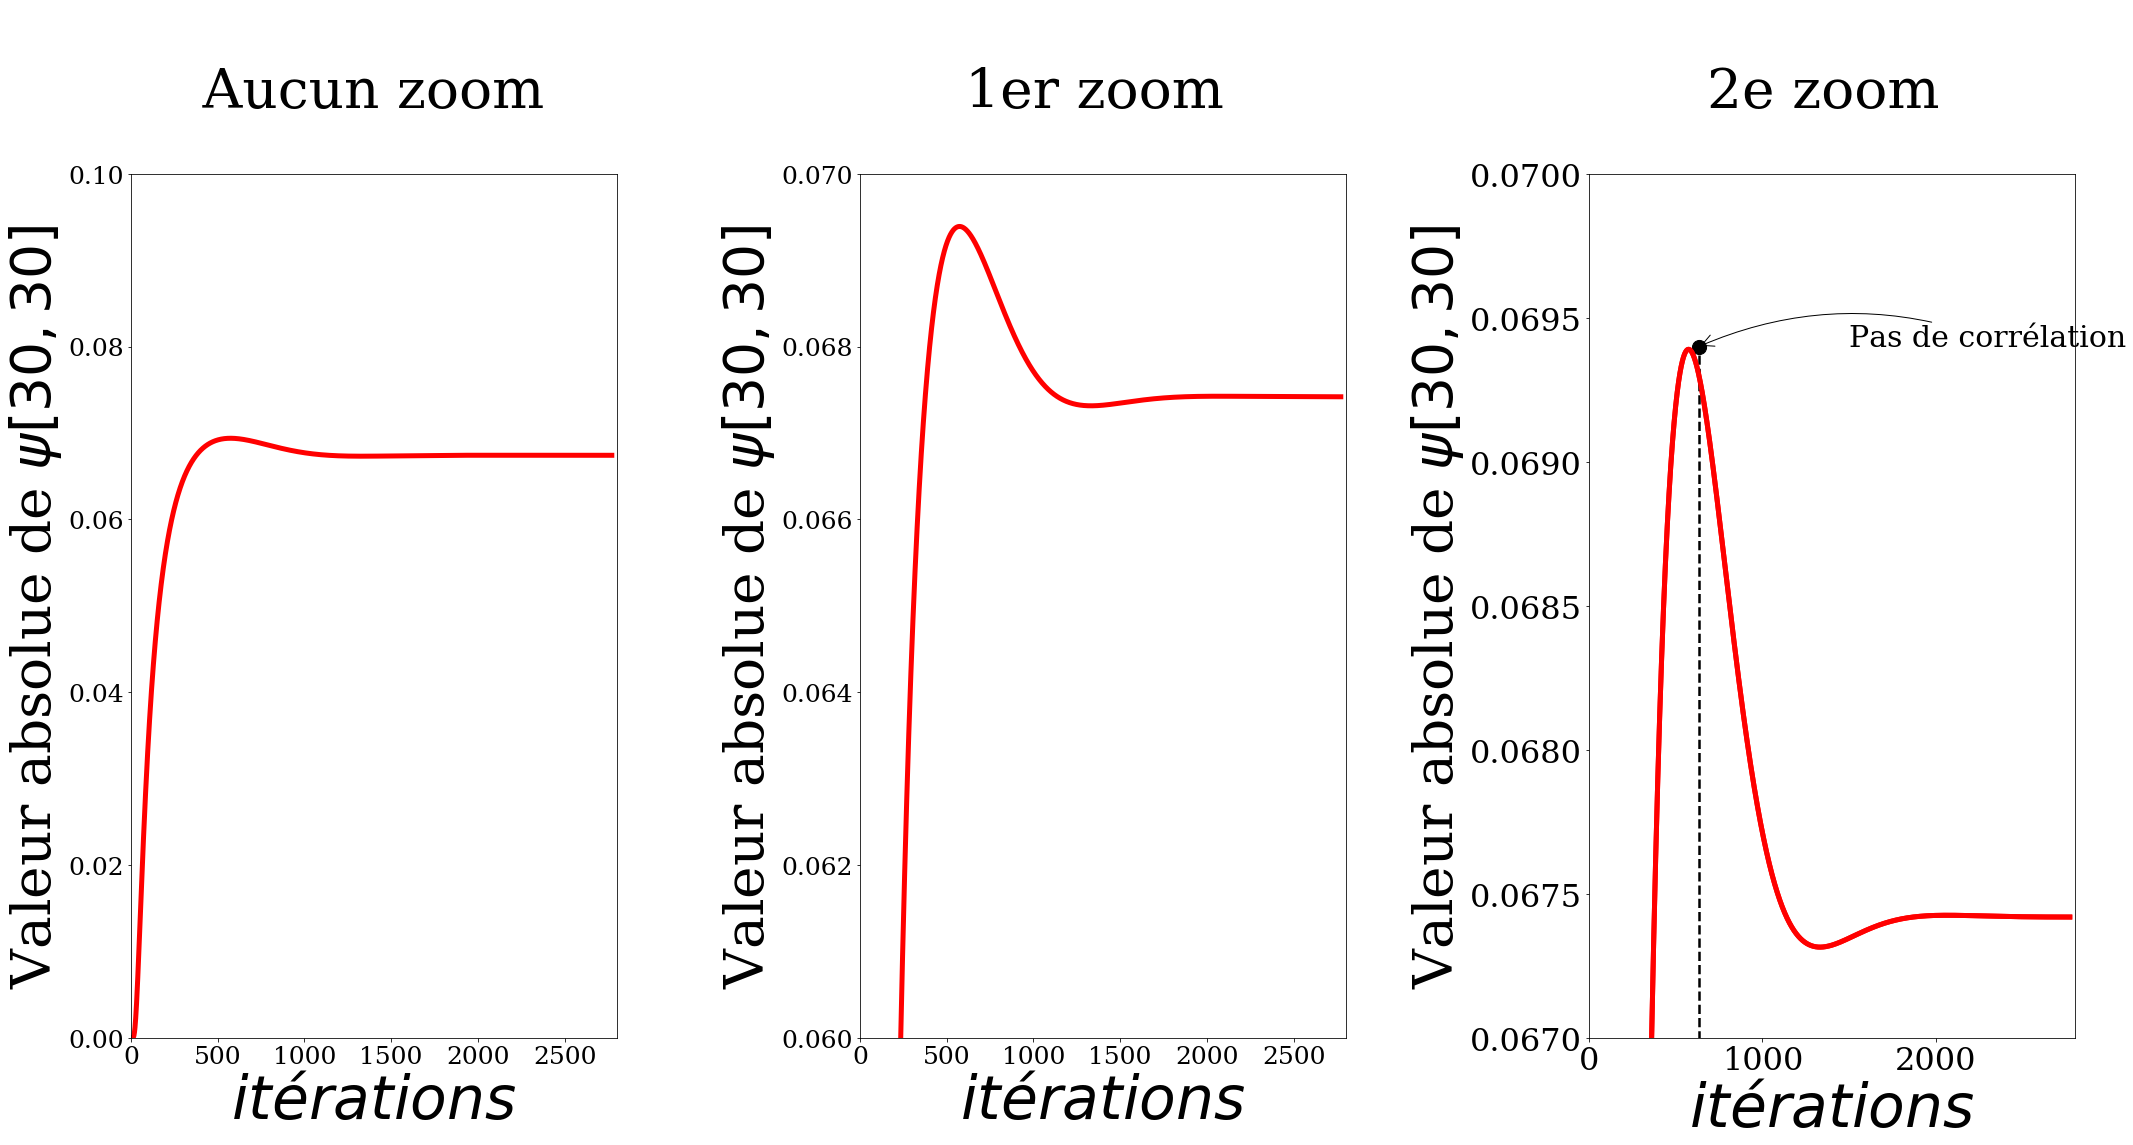

In [41]:
fig = pyplot.figure(figsize = (30, 30))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.title("\n Aucun zoom \n", fontsize = 55)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
pyplot.xlabel("$itérations$", fontsize=60)
ax.set_ylim(0,0.1)
ax.set_xlim(0,2800)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
pyplot.tick_params(axis='both', labelsize=25)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.title("1er zoom \n", fontsize = 55)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
pyplot.xlabel("$itérations$", fontsize=60)

ax.set_ylim(0.060,0.070)
ax.set_xlim(0,2800)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
pyplot.tick_params(axis='both', labelsize=25)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.title("2e zoom \n", fontsize = 55)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
#réglage des pointillés reliant l'axe
pyplot.plot([633,633],[0,0.06940], color ='k', linewidth=2.5, linestyle="--")
#réglage du point
pyplot.scatter([633,],[0.06940,], 200, color ='k')
#réglage flèche et texte
ax.annotate("Pas de corrélation", xy=(633,0.06940), xytext=(1500, 0.06940),
            fontsize=30, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=.2"),)
ax.set_ylim(0.067,0.070)
ax.set_xlim(0,2800)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
pyplot.tick_params(axis='both', labelsize=32)

pyplot.show()

Bien que cette série de zoom successif nous ai permis de mettre en évidence d'autres fluctuations, nous constatons malheureusement que la première d'entre-elle n'est d'ores et déjà pas corrélée au nombre d'itération correspondant au rebond de la convergence de part le marqueur légèrement décalé par rapport au maximum du pic.

Toutefois, si nous réfléchissons quelque peu à l'origine du nombre d'itération obtenue plus haut, nous pouvons comprendre d'où vient ce décalage/cette différence d'itération.

---

#### Etape 3 : Corrélation par la norme L1 de $\psi[30,30]$ .
---

En effet, le nombre d'itération obtenu correspond au rebond de la norme L1. Or pour une itération donnée, la norme L1 est le fruit d'une "moyenne" calculée à partir de la norme L1 des ($n_x$ x $n_y$) $\psi$ de notre domaine. Par conséquent, si nous voulons réaliser notre correlation il faut calculer la norme L1 pour la cellule [30,30] uniquement. Il convient dès lors d'introduire notre 3ème et dernier nouveau tableaux : " *l1_conv30* " qui contiendra donc autant de valeur de la norme L1 de la cellule [30,30] que d'itération.

Notons enfin qu'il n'est à nouveau pas nécessaire de rappeler notre fonction Jacobi étant donné que notre tableau à, lors du premier appel, déjà été extrait. Par conséquent, nous pouvons directement réaliser le graphique de la norme L1 désiré.

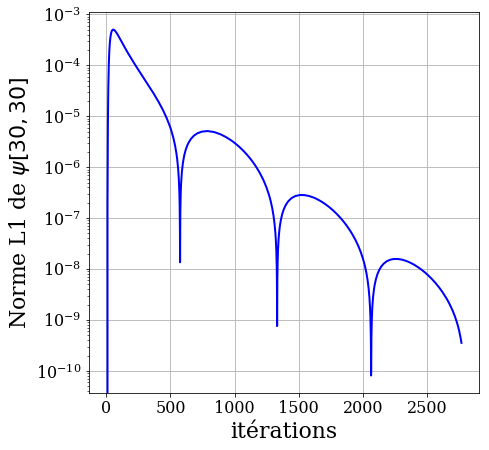

In [42]:
pyplot.figure(figsize=(7,7))
pyplot.grid(True)
pyplot.xlabel("itérations", fontsize=22)
pyplot.ylabel("Norme L1 de $\psi [30,30]$", fontsize=22)
pyplot.semilogy(numpy.trim_zeros(l1_conv30,'b'),
                'b-', lw=2);

À première vue cela semble tout à fait correcte étant donné que le nombre de "rebond" est identique à ce que nous avions précédemment obtenu. Une différence notable (si on ne prête pas attention aux ordres de grandeurs qui ont changés mais qui est tout à fait normal) est toutefois à noter : la montée lors des premières itérations.

En réalité, il ne s'agit pas d'une réelle différence car cette augmentation de la valeur de la norme était déjà présente mais était fortement adoucie par la moyenne. Quant à son origine, elle est simplement due à l'établissement de la dynamique de notre sytème.

Tentons à présent d'extraire de nos données, les itérations auxquelles interviennent les "rebonds". Pour se faire, nous procédons similairement à ce qui a été fait plus haut à la différence que nous comparons chaque valeur aux deux valeurs qui la précèdent et succèdent et ce afin de s'assurer qu'on obtient bien le minimum désiré.

En effet, dans une première version de ce boléen, identique à ce qui avait été fait plus haut, on nous renvoyait jusqu'à deux minimas autour de la valeur qui nous intéressait. Ce qui signifiait que nous n'avions pas obtenu le minimum "local" et que nos conditions de vérification devaient-être raffinés.

Nous obtenons ainsi avec notre nouveau booléen :

In [43]:
mini=[]
mini_ite=[]

for i in range(2770):
    if l1_conv30[i]<l1_conv30[i+1]\
    and l1_conv30[i]<l1_conv30[i+2]\
    and l1_conv30[i]<l1_conv30[i-1]\
    and l1_conv30[i]<l1_conv30[i-2]:        
        mini.append(l1_conv30[i])
        mini_ite.append(i) 
        
for i in range (3):
    if i<1 :
        print("\n→ La valeur du", i+1,"er minimum est", mini[i],"et intervient \n à l'itération :", mini_ite[i],"\n")
    else:
        print("→ La valeur du", i+1,"ème minimum est", mini[i],"et intervient \n à l'itération :", mini_ite[i],"\n")


→ La valeur du 1 er minimum est 1.3582545768664467e-08 et intervient 
 à l'itération : 575 

→ La valeur du 2 ème minimum est 7.594130879695626e-10 et intervient 
 à l'itération : 1332 

→ La valeur du 3 ème minimum est 8.114312000095936e-11 et intervient 
 à l'itération : 2065 



Que nous pouvons maintenant tenter de corréler graphiquement.

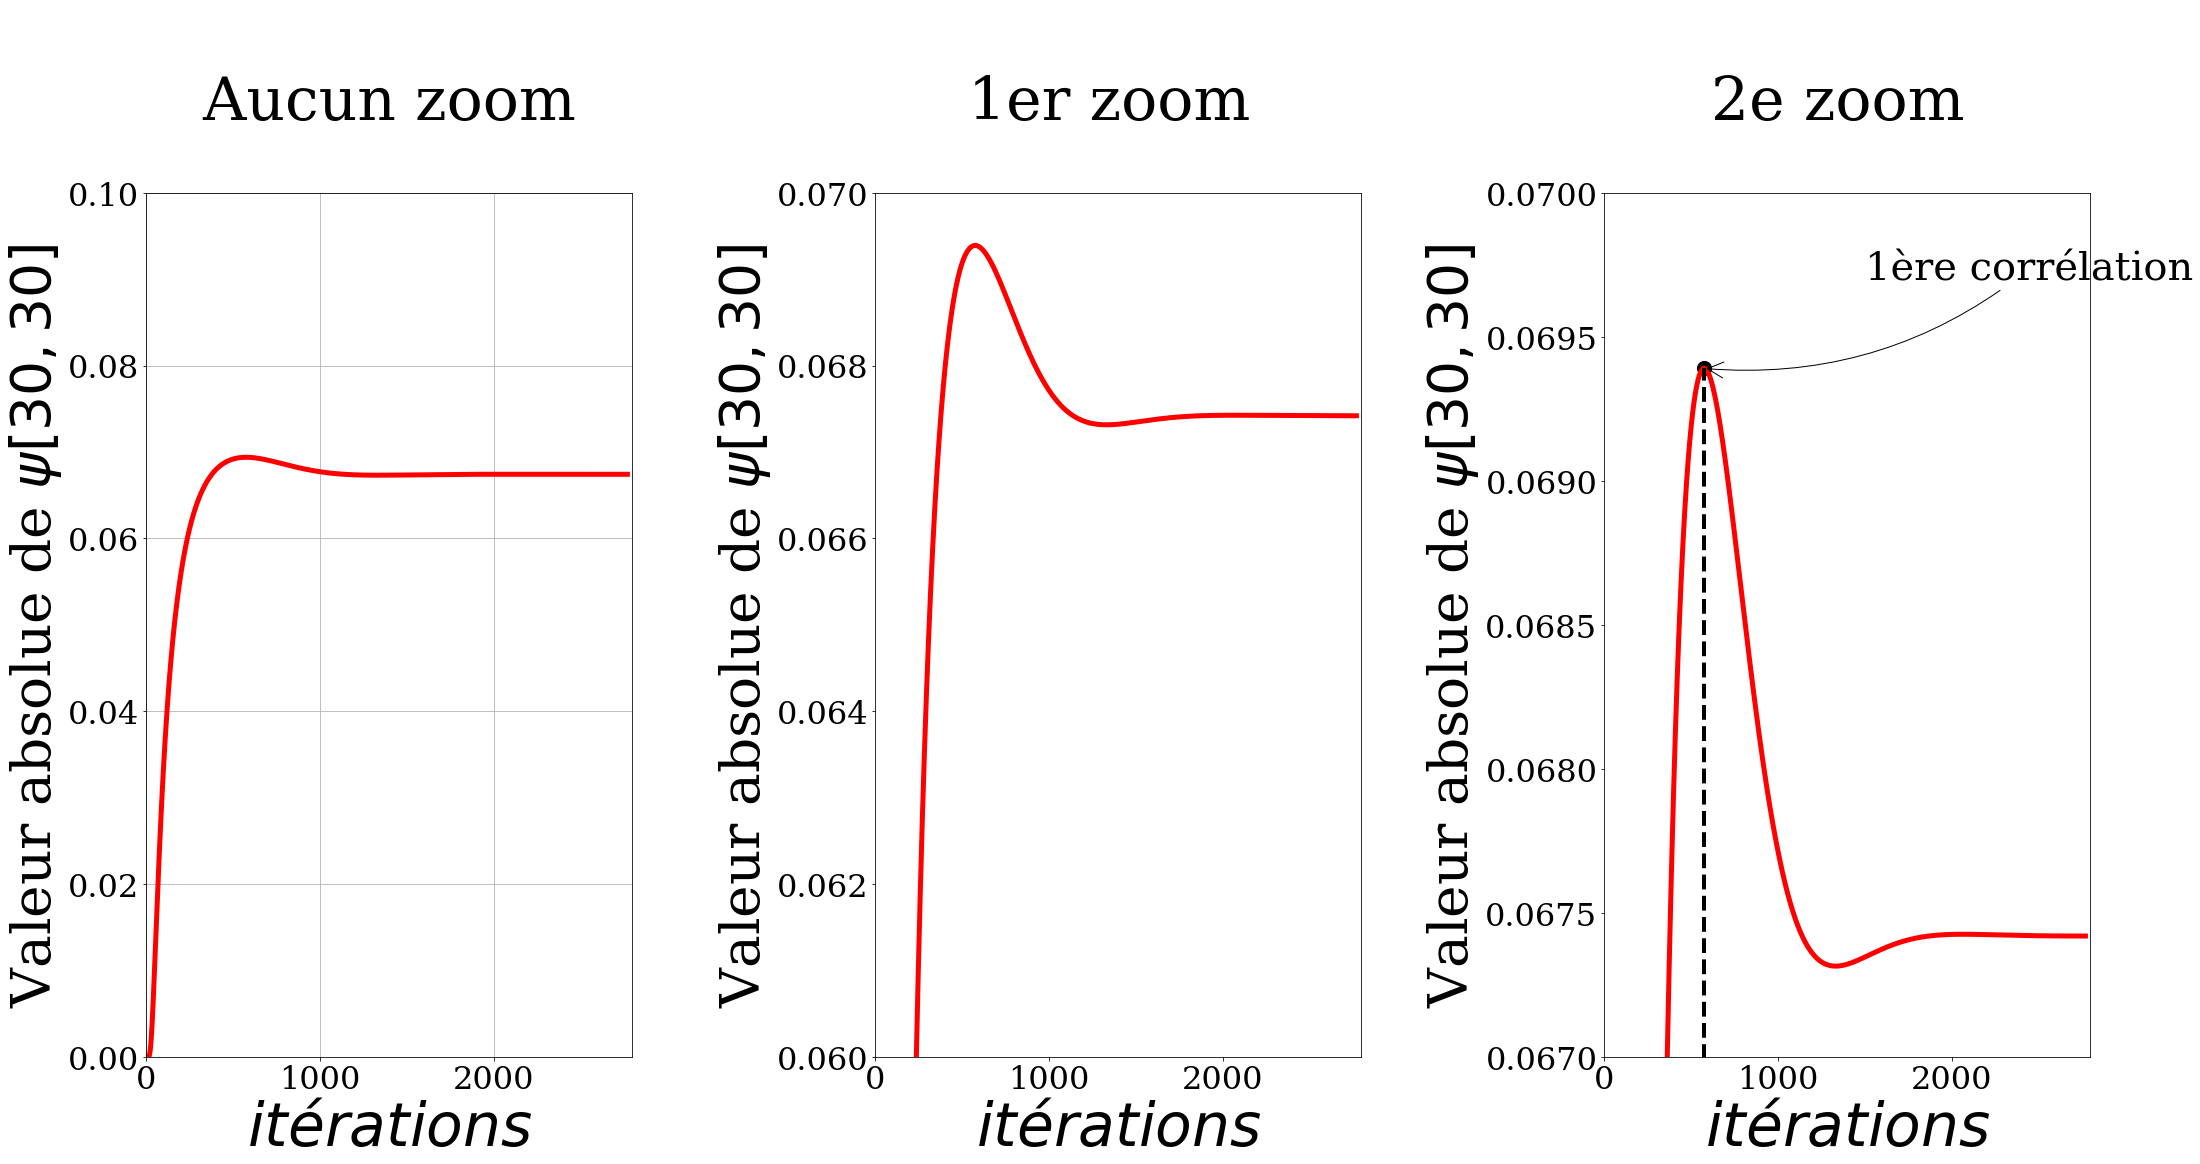

In [44]:
fig = pyplot.figure(figsize = (30, 30))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.title("\n Aucun zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
ax.set_ylim(0,0.1)
ax.set_xlim(0,2800)
pyplot.grid(True)
pyplot.tick_params(axis='both', labelsize=32)


#Graphique 2
ax = fig.add_subplot(132)
pyplot.title("1er zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
ax.set_ylim(0.060,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


#Graphique 3
ax = fig.add_subplot(133)
pyplot.title("2e zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'r-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[0],mini_ite[0]],[0,0.06939], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[0],],[0.06939,], 200, color ='k')
#réglage flèche et texte
ax.annotate("1ère corrélation", xy=(mini_ite[0],0.06939), xytext=(1500, 0.06970),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.2"),)
ax.set_ylim(0.067,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


pyplot.show()

La première fluctuation est parfaitement corrélée ! Regardons ensuite si les deux autres le sont aussi en procédant à des zooms successifs autour des nouvelles régions concernées.

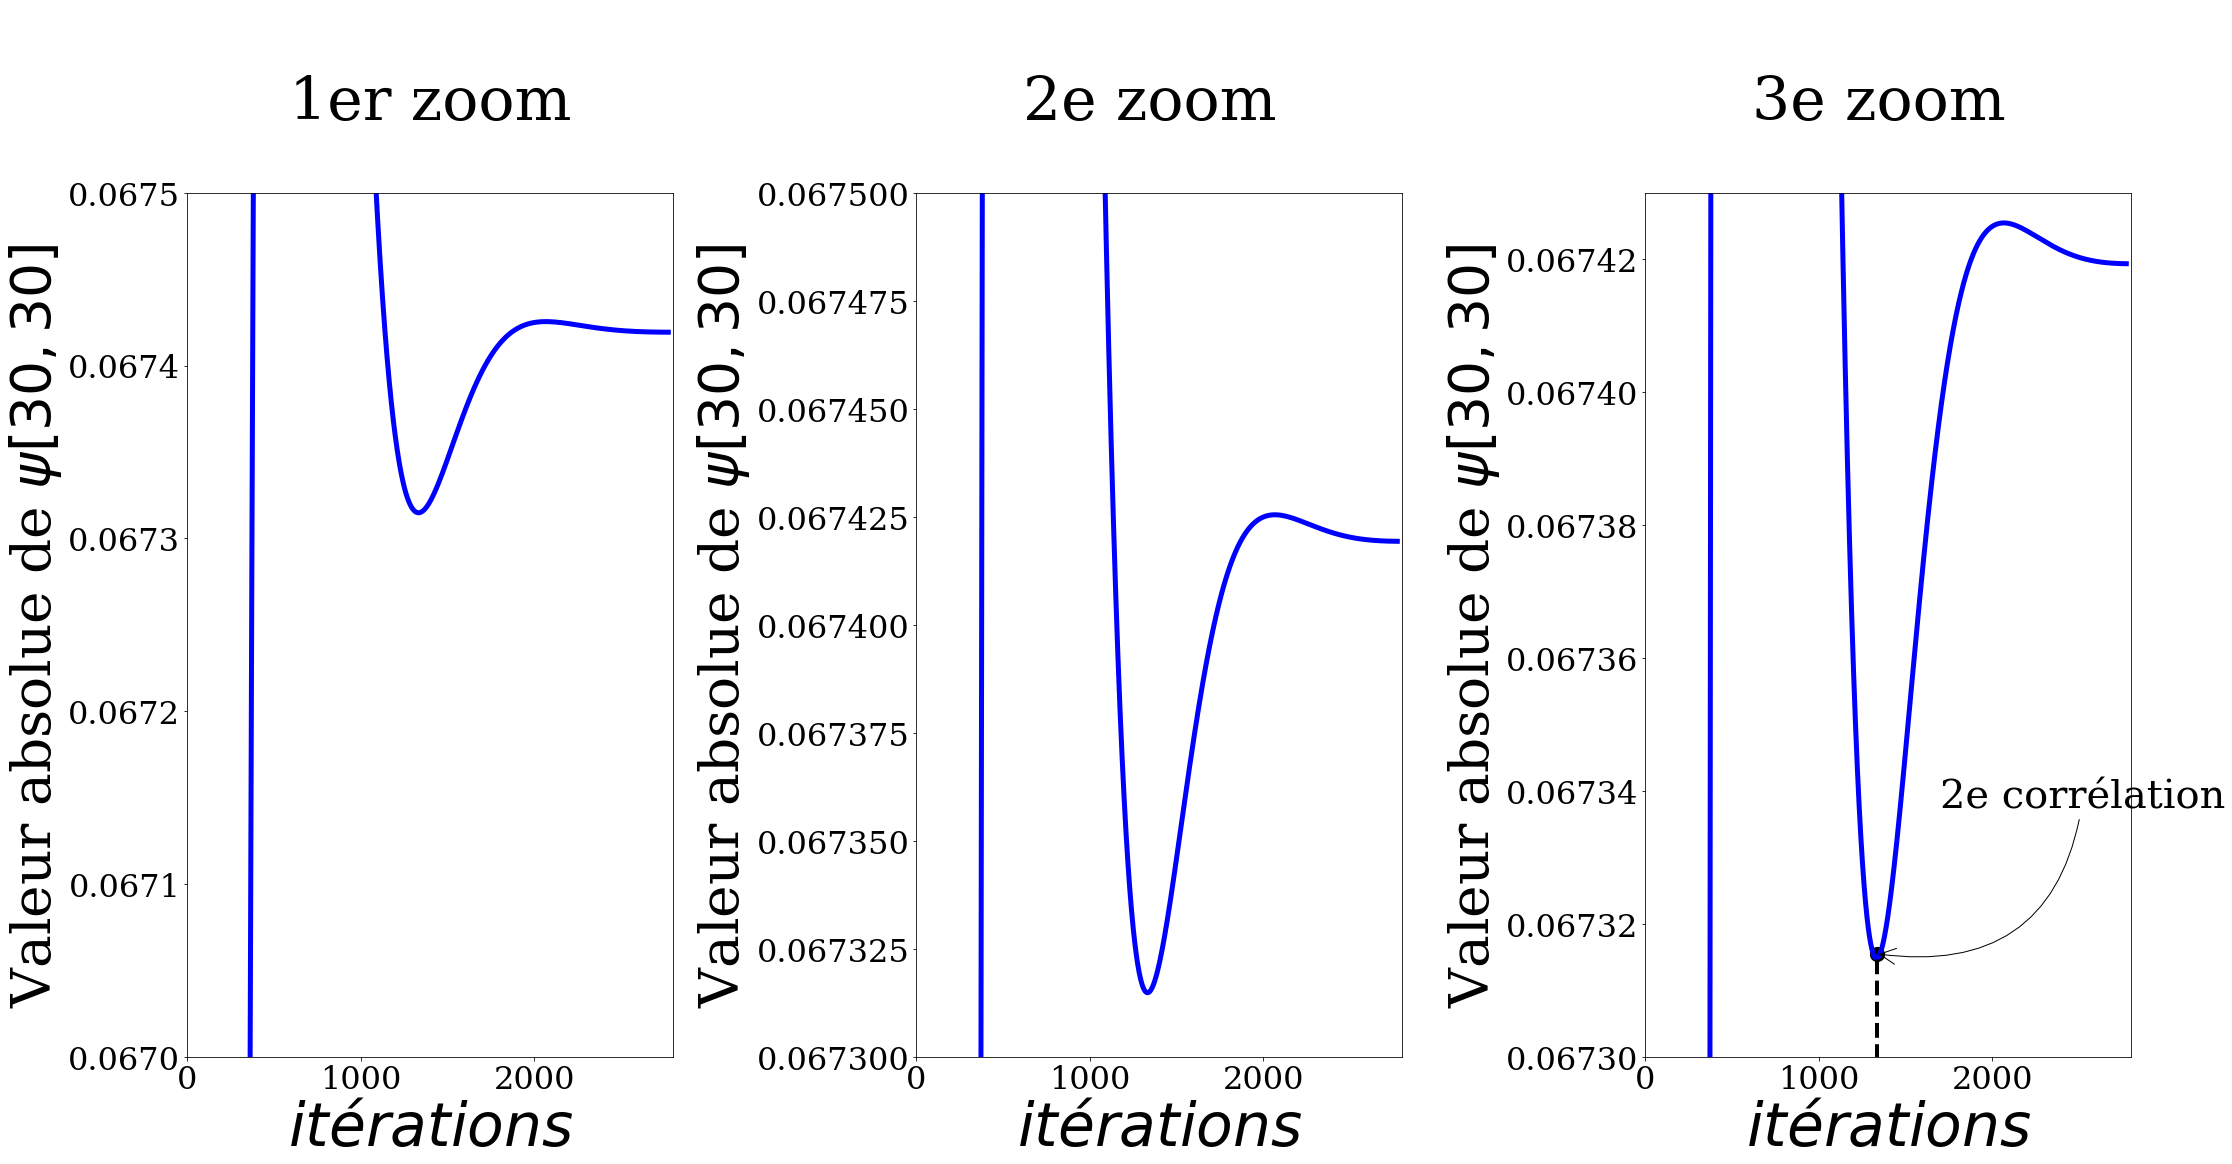

In [45]:
fig = pyplot.figure(figsize = (30, 30))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.title("\n 1er zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'b-', lw=5)
ax.set_ylim(0.0670,0.0675)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.title("2e zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'b-', lw=5)
ax.set_ylim(0.0673,0.0675)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.title("3e zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'b-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[1],mini_ite[1]],[0,0.0673155], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[1],],[0.0673155,], 200, color ='k')
#réglage flèche et texte
ax.annotate("2e corrélation", xy=(mini_ite[1],0.0673155), xytext=(1700, 0.0673375),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.5"),)
ax.set_ylim(0.06730,0.06743)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


pyplot.show()

Enfin, pour la 3ème fluctuations.

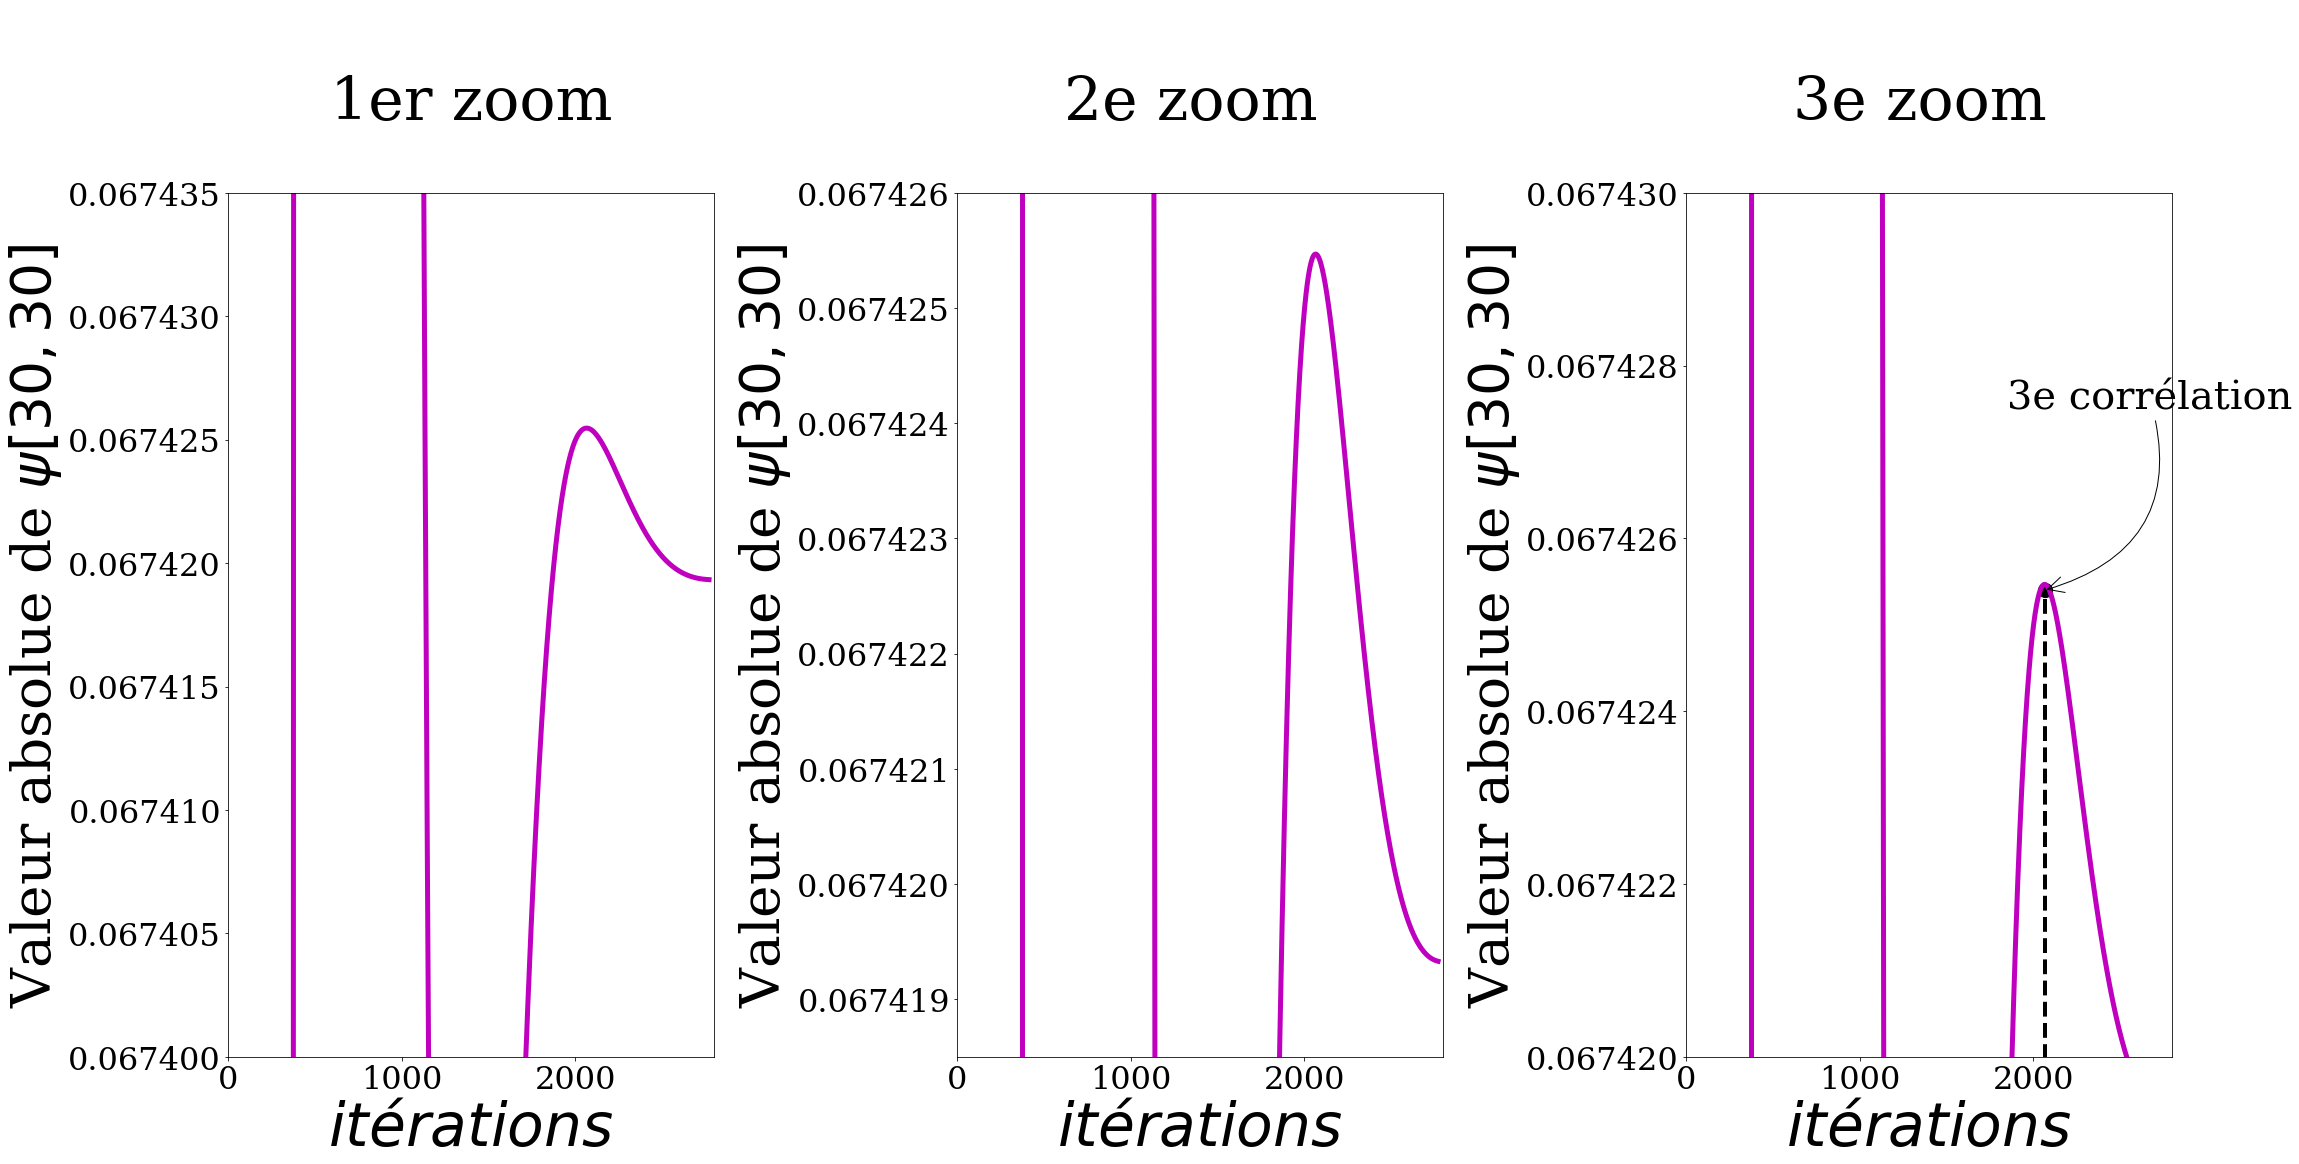

In [46]:
fig = pyplot.figure(figsize = (30, 30))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.title("\n 1er zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'm-', lw=5)
ax.set_ylim(0.06740,0.067435)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.title("2e zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'm-', lw=5)
ax.set_ylim(0.0674185,0.0674260)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.title("3e zoom \n", fontsize = 60)
pyplot.xlabel("$itérations$", fontsize=60)
pyplot.ylabel("Valeur absolue de $\psi[30,30]$", fontsize=55)
line, = ax.plot(xsi, numpy.abs(p_30), 'm-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[2],mini_ite[2]],[0,0.0674254], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[2],],[0.0674254,], 200, color ='k')
#réglage flèche et texte
ax.annotate("3e corrélation", xy=(mini_ite[2],0.0674254), xytext=(1850, 0.0674275),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.5"),)
ax.set_ylim(0.0674200,0.0674300)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)

pyplot.show()

Nous venons ainsi de corréler les 3 "rebonds" observés dans la convergence de la norme L1 aux fluctuations de la valeur de $\psi$. Par conséquent, nous pouvons en conclure que le comportement de la norme L1 et de sa convergence est intimement lié à la physique de notre problème. En d'autres mots, le chemin qu'empruntera la convergence de la norme L1 pour parvenir à la précision désirée est propre au problème.

Notons enfin que tout ceci est également vrai pour les normes L2 et infini également utilisées en analyse numérique.

---

##### 6. Bonus.
---

Pour finir ce travail consacré au problème "*Stokes flow*", nous nous proposons ici de retrouver le caractère hyperbolique des lignes de courants. Pour se faire, nos conditions initiales vont devoir être revues car le comportement des lignes de courant que l'on veut observer dérive d'une situation quelque peu différente de celle que nous avons traité jusqu'ici. 

Physiquement, avoir une hyperbolicité des lignes de courant correspond au cas d'un fluide s'écoulant dans un tuyau. Le fluide n'est donc plus piégé dans une cavité, mais pénètre par une extrêmité de notre domaine et en ressort par l'extrêmité opposée.

Par conséquent, il nous faut modifier nos conditions aux bords et leur discrétisation selon le paramètrage que nous désirons. 

* Pour les bords inférieur et supérieur : nous devons imposer un courant nul au bord inférieur mais vallant " $L$ " au bord supérieur. Il en découlle directement que la vitesse sur les bords supérieur et inférieur s'annule : $\frac{\partial \psi}{\partial y} = 0 $ 

* Pour les bords gauche et droit : vu que nous aurons un gradient de courant constant, $\frac{\partial \psi}{\partial y} = l$  sur les bords gauche et droit, la fonction de courant $\psi$ doit, par continuité, valoir $yl$.

En résumé, nous disposons ainsi de l'ensemble des conditions aux bords repris sur la figure 4 ci-dessous.


![Image](./figures/nouvelles_CB.png)

---
###### Figure 4. Schéma récapitulatifs de l'ensemble des CB correspondants à notre nouvelle situation.

---

Une conséquence immédiates de ces nouvelles conditions est que notre discrétisation de $\omega$ aux bords doit-être revue.

En effet, $\psi$ n'étant plus forcément nul, un terme supplémentaire peut apparaitre dans l'expression de $\omega$ en fonction du bord considéré. Ainsi en repartant des relations dérivées dans l'introduction théorique de ce travail, tout en veillant à respecter nos nouvelles CB, nous obtenons les discrétisations de $\omega$ suivante :

$$
\left\{
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i, j+1} - \psi_{i, j+2})+ \mathcal{O}(\Delta ^2)  \hspace{3.0cm} \text{ } \text{(bord inférieur)}\\
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i, j-1} - \psi_{i, j-2}) + \frac{7 \psi_{i,j}}{2\Delta ^2} + \mathcal{O}(\Delta ^2)  \hspace{1.4cm} \text{(bord supérieur)}\\
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i+1, j} - \psi_{i+2, j}) + \frac{3u_{i}}{\Delta} + \frac{7 \psi_{i,j}}{2\Delta ^2} + \mathcal{O}(\Delta ^2)  \hspace{0.5cm} \text{(bord gauche)}\\
\omega_{i,j} = -\frac{1}{2 \Delta ^2} (8\psi_{i-1, j} - \psi_{i-2, j}) + \frac{3u_{i}}{\Delta} + \frac{7 \psi_{i,j}}{2\Delta ^2} + \mathcal{O}(\Delta ^2)  \hspace{1.0cm} \text{(bord droit)}
\end{array}
\right.
$$

que nous pouvons à présent implémenter dans une nouvelle fonction tout en tenant compte de la méthode de résolution que nous utiliserons$^*$ à savoir, la méthode de SOR optimisée.

$
{}
$

---
$*$ Car pour rappel, notre implémentation change en fonction du fait que l'on utilise une méthode de résolution compilée ou non.

In [47]:
@jit(nopython=True)
def CBhyp(psi, om):

    for i in range(1,nx-1):
        om[0,i] = (-.5/(d**2))*(8*psi[1,i]-psi[2,i])        # Bord inférieur
        om[-1,i] = (-.5/(d**2))*(8*psi[-2,i]-psi[-3,i])\
                 + ((7*psi[-1,i])/(2*d**2))                 # Bord supérieur

    for j in range(1,ny-1):     
        om[j,0] = (-.5/(d**2))*(8*psi[j,1]-psi[j,2])\
                + ((3*l)/d) + ((7*psi[j,0])/(2*d**2))       # Bord gauche
        om[j,-1] = (-.5/(d**2))*(8*psi[j,-2]-psi[j,-3])\
                 + ((3*l)/d) +((7*psi[j,-1])/(2*d**2))      # Bord droit
    return om

Nous rappelons ensuite nos conditions initiales et nous implémentons les nouvelles conditions au bords de Dirichlet.

In [48]:
# Conditions initiales
psi0 = numpy.zeros((ny,nx))
om0  = numpy.zeros((ny,nx))

for i in range (nx):
    psi0[i,0] = y[i]*l     # Bord gauche
    psi0[i,-1] = y[i]*l    # Bord droit
    psi0[0,i] = 0          # Bord inférieur
    psi0[-1,i] = l         # Bord supérieur

# Appel de notre fonction pour les conditions aux bords omega
om0 = CBhyp(psi0, om0)

Dont-on peut vérifier l'implémentation graphiquement.

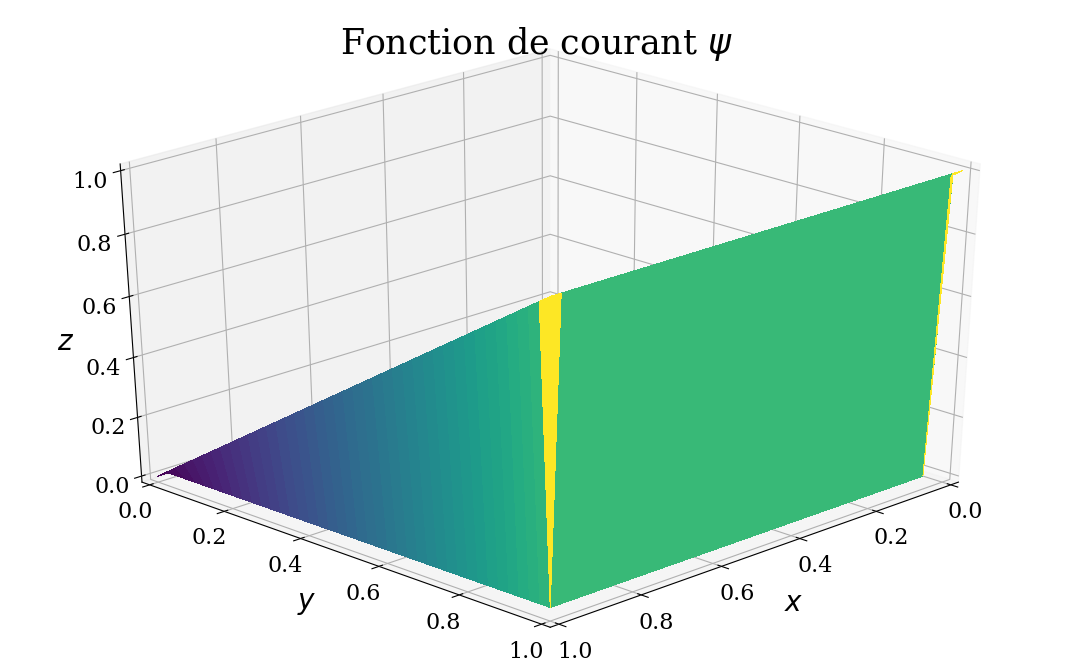

In [49]:
plot_3D(x,y,psi0)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)
pyplot.tight_layout()

Et pour la fonction de vorticité

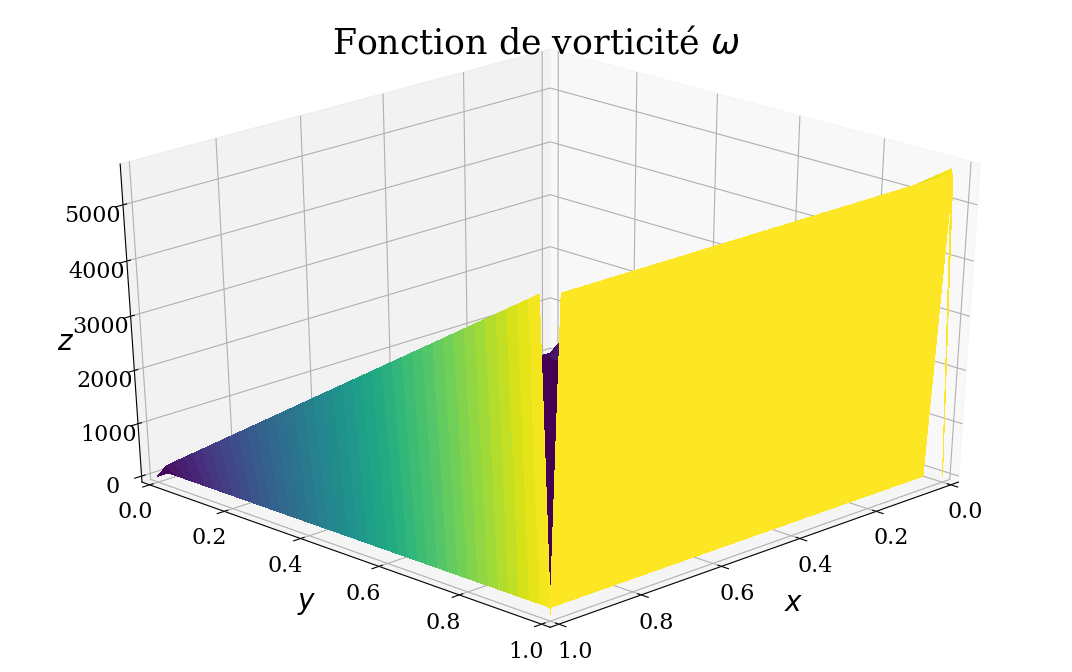

In [50]:
plot_3D(x,y,om0)
pyplot.title("Fonction de vorticité $\omega$", fontsize = 25)
pyplot.tight_layout()

Ce qui semble tout à fait correct. Enfin, implémentons notre fonction de SOR optimisée en tenant compte de notre nouvelle fonction pour les conditions au bord.

In [51]:
@jit(nopython=True)
def OSORhyp(om, omn, psi, psin, d, l1_target, omega):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''


    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(4000)
    l1_diff_om = numpy.zeros(4000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = (1-omega)*om[j,i] + omega*0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])

        # On impose les conditions aux bords
        CBhyp(psi, om) 
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = (1-omega)*psi[j,i] + omega*0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)
            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi

Finalement, après appel de notre fonction,

In [52]:
psihyp = OSORhyp(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

nous optenons la figure suivante de la fonction courant pour notre problème.

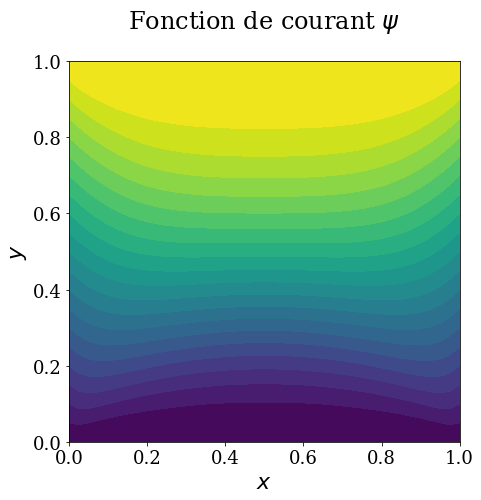

In [53]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psihyp,20,cmap=cm.viridis)
pyplot.title("Fonction de courant $\psi$\n", fontsize = 24)
pyplot.xlabel('$x$', fontsize=22)
pyplot.ylabel('$y$', fontsize=22)
pyplot.tick_params(axis='both',labelsize=18)

Ce qui correspond tout à fait à ce que nous voulions observé, e.g l'hyperbolicité des lignes de courant.

---

##### 7. Conclusions.
---

Dans ce travail, nous avons résolu le problème d'un écoulement de Stokes dans une cavité carrée à couvercle à l'aide des méthodes de résolution numérique étudiées tout au long du module 5 " *Relax* ". Nous avons ainsi obtenu des résultats en accord avec ceux qui nous ont été fournis par le site http://openedx.seas.gwu.edu.

Ensuite, grâce à l'étude comparative des performances de nos méthodes, nous avons pu vérifier que la méthode de SOR optimisée était bien la plus éfficace et la plus rapide pour résoudre un problème numérique. 

Concernant la convergence de ces méthodes, nous avons remarqués une particularité au niveau de l'allure des courbes obtenues et ce quelque soit la méthode utilisée. Une investigation, nous a alors permis de mettre en évidence une relation entre les oscillations observées sur les graphiques de la convergence et les fluctuations de la valeur de la fonction courant. Ces oscillations étaient donc bien liées à la physique du problème comme nous le suspections ce qui nous a ainsi permis d'écarter une éventuelle " anomalie numérique ".

Enfin, nous avons décidé de terminer ce travail par un petit exercice qui consistait à retrouver l'hyperbolicité des lignes de courant. Cette étude a été l'occasion de parfaire notre compréhension de la discrétisation des conditions aux bords et leur importance dans un problème donné.

Pour conclure, nous avons pu, par le biais de ce travail et des recherches associées, nous rendre compte du fait que le problème " *Stokes Flow* " n'est pas qu'un problème académique, mais pouvait servir de modèle de base dans l'étude de problème plus complexe tel que l'écoulement de l'air sur une surface comportant des aspérités voir même au sein d'une ville.

---

##### 8. Sources.
---

[1] Cours de physique générale III (PHYS-F-201), " deuxième partie : milieux continus ", présenté par M. Nicolas CHAMEL (2014-2015) 

[2] Méthode SPH : http://onlinelibrary.wiley.com/doi/10.1002/fld.4196/full

[3]https://epiportal.com/Ebooks/Numerical%20Methods%20for%20Engineers%20and%20Scientists.pdf

---
###### La cellule ci-dessous charge le style du notebook.

In [54]:
from IPython.core.display import HTML
css_file = 'styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())